##  Introduction
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.


###  Data Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


###  Features Discription

- customerID : Customer ID
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

###  Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

### Loading the Dataset

In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

### Droping Duplicates

In [7]:
data.drop_duplicates()
data.shape

(7043, 21)

- No duplicates values are present.

### Checking unique values

In [8]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

#  EDA
###  Checking Null Values

In [9]:
data['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
20.15       6
20.25       6
19.45       6
20.3        5
20.45       5
19.85       4
69.9        4
20.4        4
70.6        4
19.2        4
69.65       4
44          4
44.4        4
20.5        4
49.9        4
74.7        4
19.3        4
19.95       4
19.5        4
75.3        4
50.15       4
20.35       4
69.6        4
19.4        4
69.95       4
19.25       3
70.45       3
1284.2      3
69.25       3
74.3        3
20.9        3
220.45      3
20.55       3
69.1        3
20.1        3
305.55      3
50.6        3
74.6        3
20          3
45.85       3
44.75       3
70.15       3
75.35       3
19.1        3
74.9        3
86.05       3
79.55       3
74.35       3
35.9        3
24.4        3
45.7        3
2317.1      3
383.65      3
50.75       3
25.25       3
55.7        3
45.1        3
84.5        3
85          3
50.45       3
80.55       3
70.3        3
24.8        3
470.2 

- In which null values present in the form of space. So replace space into nan

In [10]:
data["TotalCharges"]=data["TotalCharges"].replace(' ',np.nan)

### Filling Null Values

In [11]:
data['TotalCharges']=data['TotalCharges'].astype(float)


In [12]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [13]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

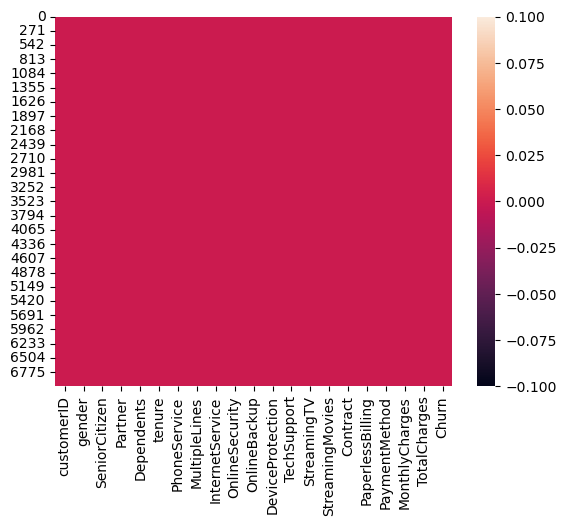

In [14]:
sns.heatmap(data.isnull())

- We can see there is no null values present in dataset.

### Checking all information

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- No null value present.
- Datatype is ok with respect to their column.

## Visualization of the data

##  Univariate Analysis

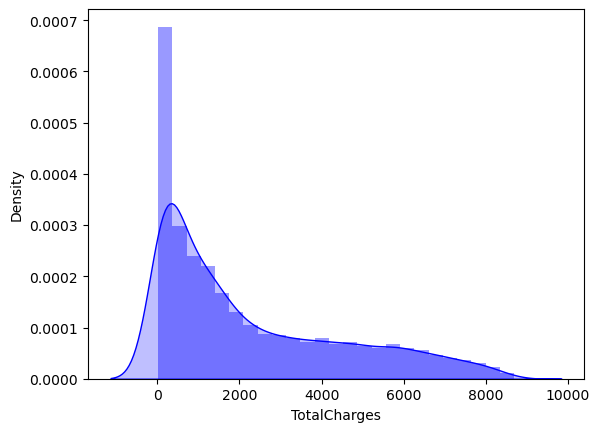

In [16]:
# Distribution plot for the column TotalCharges 
sns.distplot(data["TotalCharges"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, TotalCharges is not normaly distributed. It seems to contain outliers.
- Data is positively skewed.

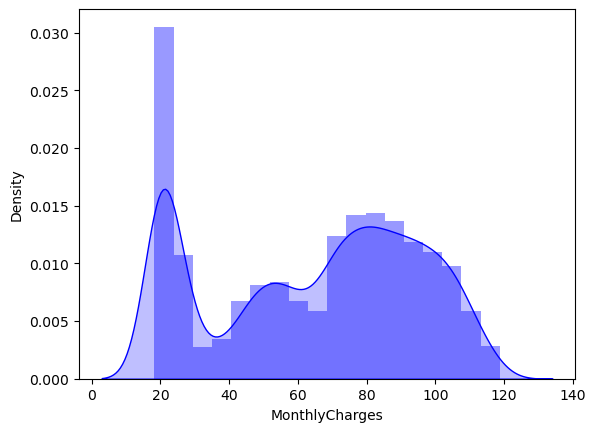

In [17]:
# Distribution plot for the column TotalCharges 
sns.distplot(data["MonthlyCharges"],color="b",kde_kws={"shade": True},)
plt.show()

- We can see, MonthlyCharges is not normaly distributed. It seems to contain outliers.
- Data is right skewed.

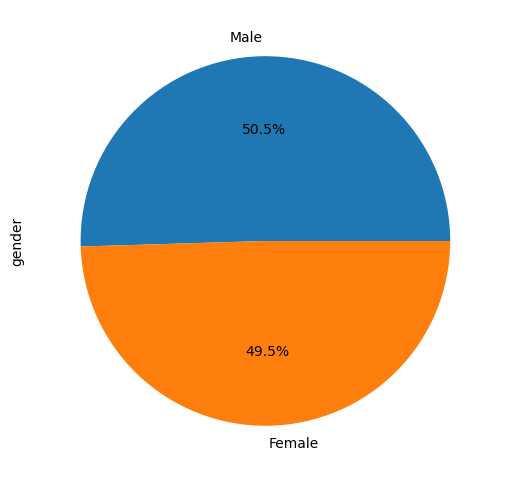

In [18]:
a=data['gender'].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- We can see, 50.5% male are more in number than female.
- Both are almost have same proportion.

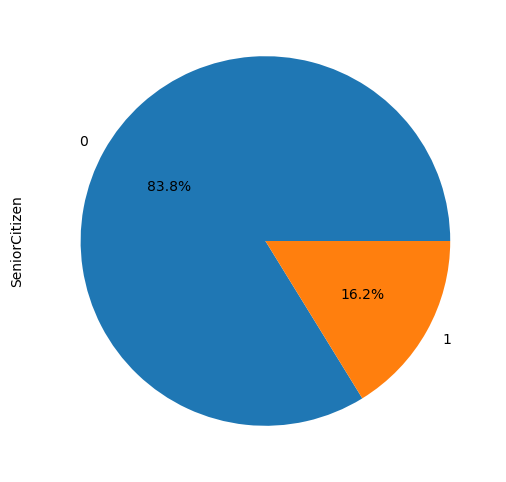

In [19]:
a=data["SeniorCitizen"].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- We can see, seniorcitizen has lower than others. only 16.2% of seniorcitizen are using services and have intrested in current company.
- But 83.8% are young customers whose used these services..

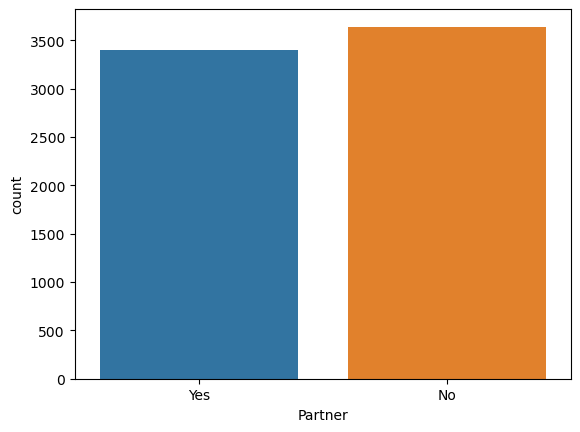

In [20]:
sns.countplot(x='Partner',data=data)
plt.show()

- "No" partner, it means those are single or no partner is higher than partner have.
- Less difference between partner have and partner don't have.

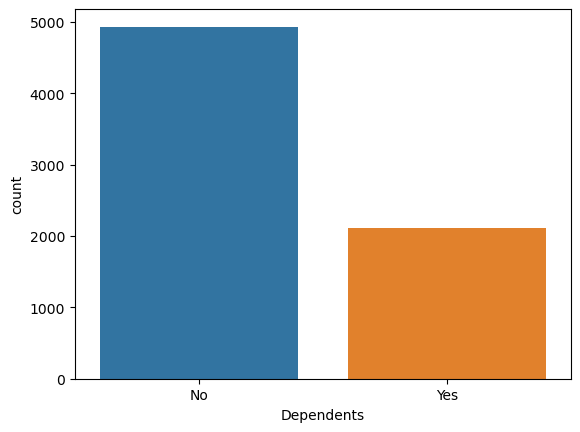

In [21]:
sns.countplot(x='Dependents',data=data)
plt.show()

- There no dependent on customer is high than yes dependents. It means that, no one is dependent on customers is higher.
- Less customer have some dependent people on them.

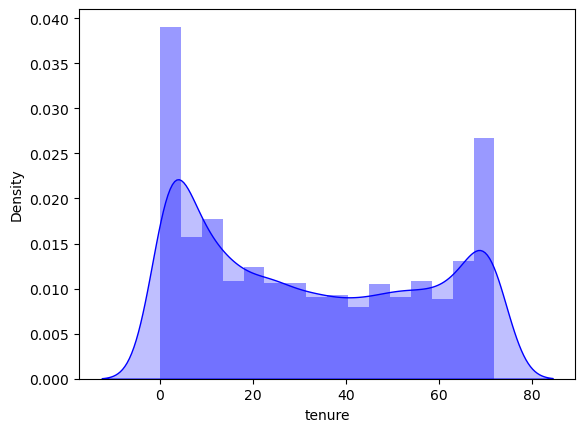

In [22]:
# Distribution plot for the column tenure
sns.distplot(data["tenure"],color="b",kde_kws={"shade": True},)
plt.show()

- Is not normaly distributed. It seems to contain outliers.
- Little right skewed.

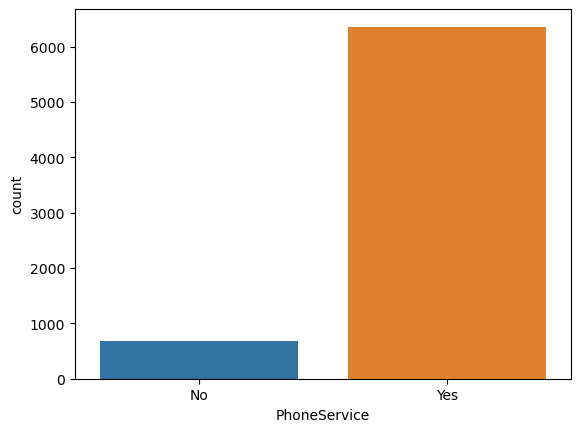

In [23]:
sns.countplot(x='PhoneService',data=data)
plt.show()

- We can see, maximum people have phone service. Custtomer is higher in number whose used pone service than no used.
- Very few customer are not using phone service.

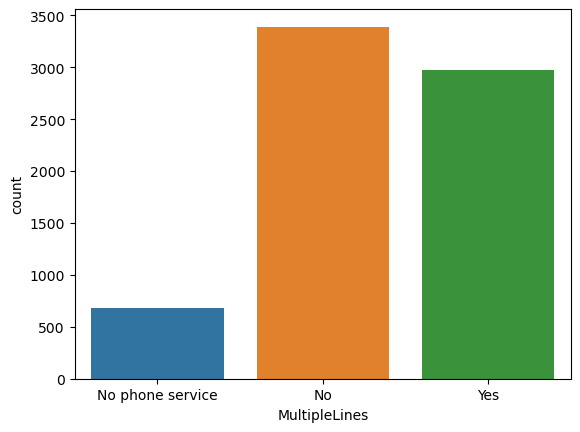

In [24]:
sns.countplot(x='MultipleLines',data=data)
plt.show()

- Whose dont used multple lines they are in more number than others. But whose used multiple line they also in high but lower than dont used.
- There are also customers whose not using phone survice.

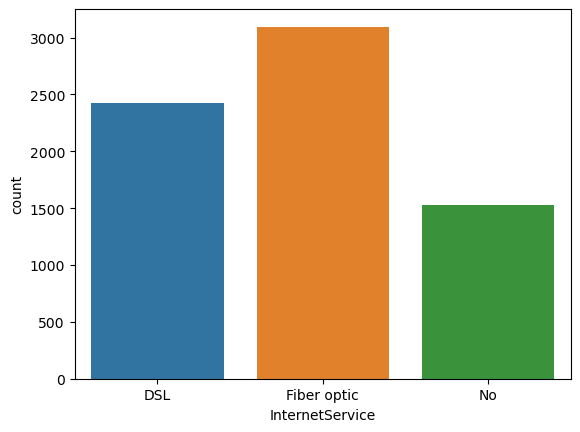

In [25]:
sns.countplot(x='InternetService',data=data)
plt.show()

- Fiber optic are most used type of internet service than others followed by DSL.
- Almost 50% of fiber obtic, they dont used internet services. We need to increses the user of internet becouse internet literacy.
- Due to no used of internet few customer are not gain some offered from company.

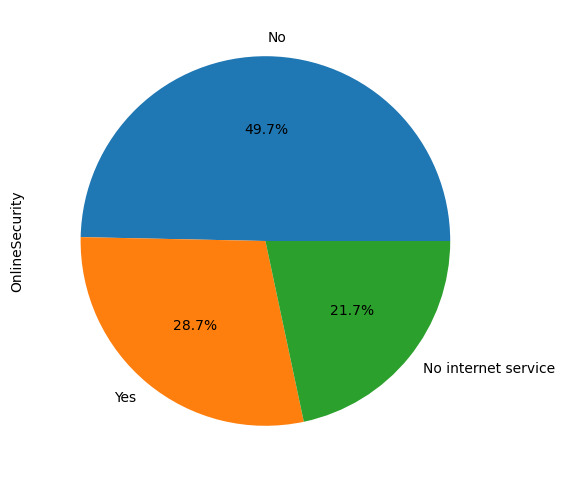

In [26]:
a=data["OnlineSecurity"].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- There are 49.7% of customer, that they think there are no online security provide by company.
- By this they are not using any services and may have high churn rate.
- Due to no internet service almost 21.7% customer are deprived from services.

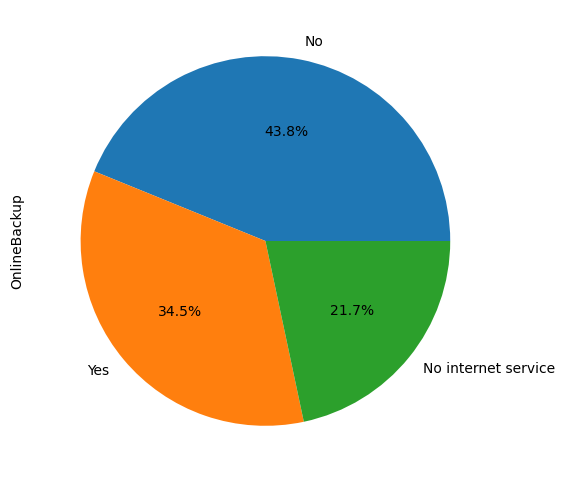

In [27]:
a=data["OnlineBackup"].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- 43.8% people or customer think that, there are no online backup facilities gives any company due to this they are not willing to used any devices or not get any services.
- 34.5% people are getting online backup service from company.

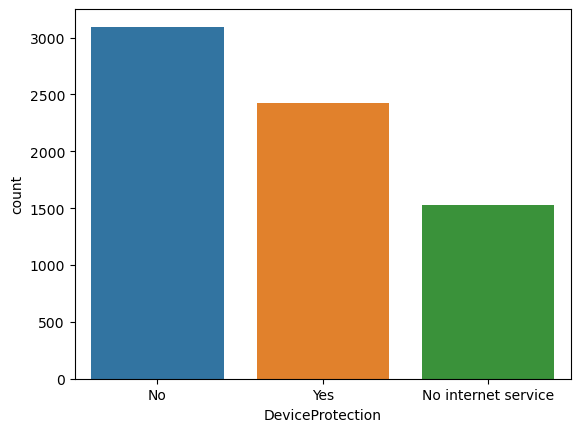

In [28]:
sns.countplot(x='DeviceProtection',data=data)
plt.show()

- Most of the customer are felt that, no one is providing any device protection service.
- Most of the people are felt that, company provide device protection.
- We can notice, No intwernet service has lowest in number than others.

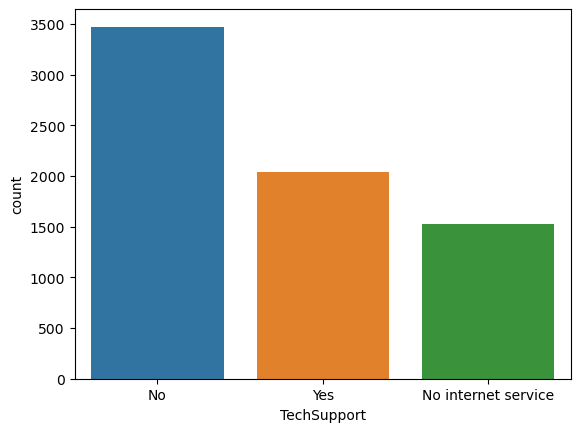

In [29]:
sns.countplot(x='TechSupport',data=data)
plt.show()

- Most of the people or customer think that, no one gives technical support to them.
- If the company or service provider want to increse their customers users so they need to focus no consumer protection services . And give them good technical support for redressing their grivances.
- And Most of the user say company techsupport is good and they happy with it.

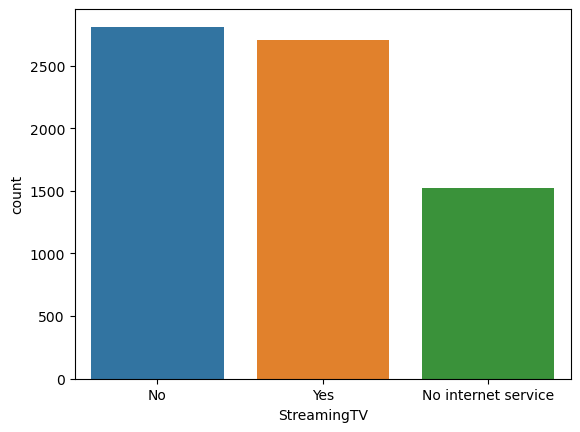

In [30]:
sns.countplot(x='StreamingTV',data=data)
plt.show()

- Most of the customer says, there are no streamming TV service providing any company that why the are not willing to take services.
- But most of the poeple thisn that, company is providing streamingTV service to them. Due to penetration of internet service most of customer would preffered to watch TV.

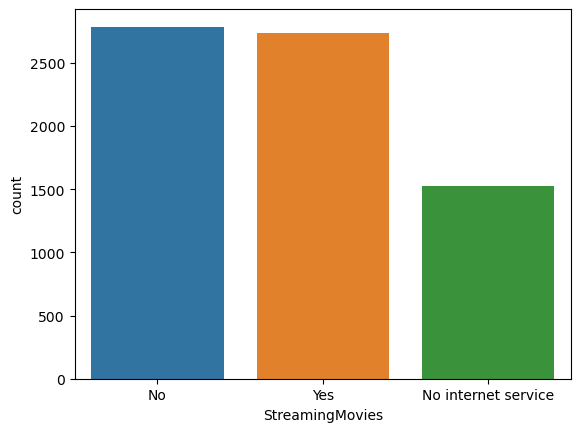

In [31]:
sns.countplot(x='StreamingMovies',data=data)
plt.show()

- Very least difference between yes and no. Some of customer are used streamingmovies service and they enjoying it.
- Due to no internet service no. of customer not using this service.

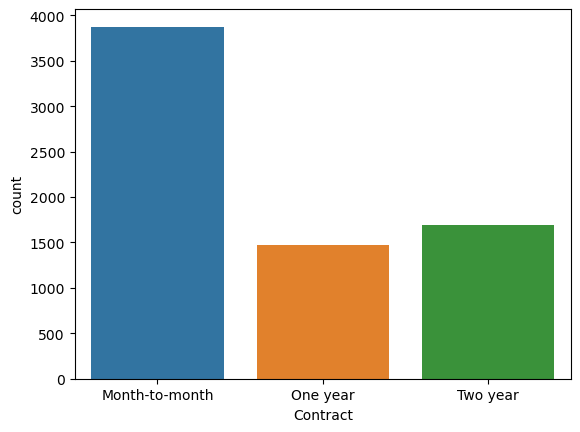

In [32]:
sns.countplot(x='Contract',data=data)
plt.show()

- Month-to-month contract is higher than others followed by two year contract.
- Most of the customer used month-to-month service.

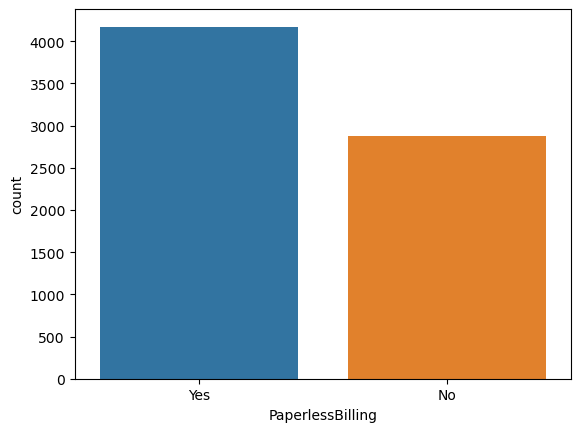

In [33]:
sns.countplot(x='PaperlessBilling',data=data)
plt.show()

- We can see, Paperless billing is higher in number. Its because, digitalization. And it is fast service than other. Most of the custome is preferred paperless billing.
- Very few customer are ndont like paperless billing system.

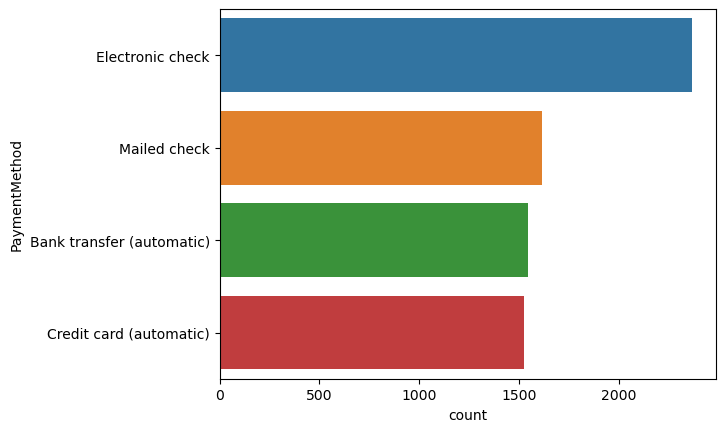

In [34]:
sns.countplot(y='PaymentMethod',data=data)
plt.show()

- Wide variety of payment method provided by the company.
- Electronic Check is higher than other. It means most of the customer are using electonic check followed by Mailed check.
- Credit card and bank transfer is almost have same users count. 

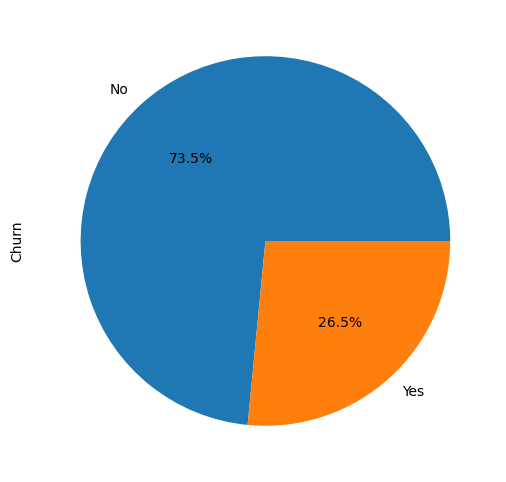

In [35]:
a=data["Churn"].value_counts()
plt.figure(figsize=(15,6))
a.plot.pie(autopct="%1.1f%%")
plt.show()

- 73.5% of customer are dont want to leave it mean churn rate is lower.
- But 26.5% of custoers want to leave.

##  Bivariate Analysis

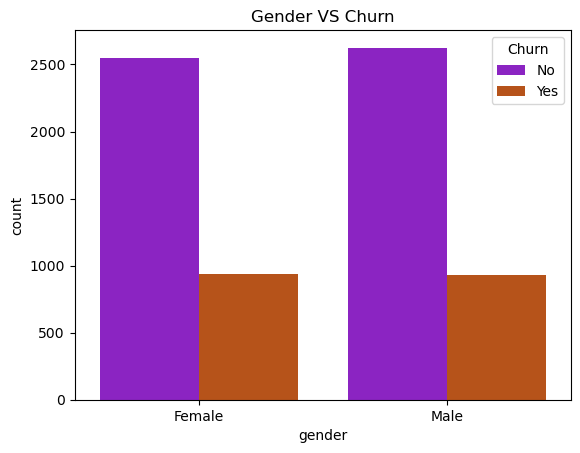

In [36]:
sns.countplot(x='gender',hue='Churn',palette="gnuplot",data=data)
plt.title('Gender VS Churn')
plt.show()

- Male customers is having lowest churn rate. It means very less customers want leave the using service.
- Both male and female almost have same churn rate.

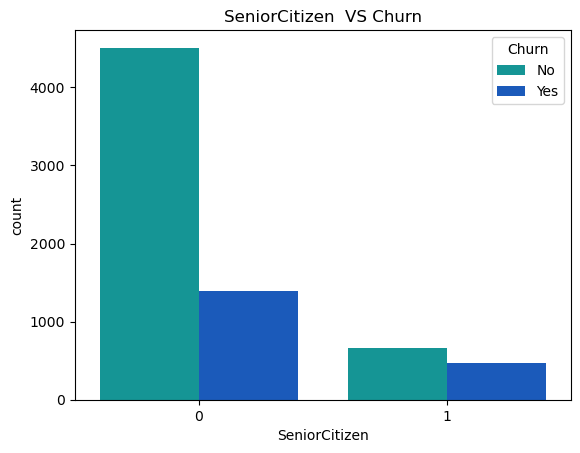

In [37]:
sns.countplot(x='SeniorCitizen',hue='Churn',palette="winter_r",data=data)
plt.title('SeniorCitizen  VS Churn')
plt.show()

- Most of the senior citizen customers want to stay with same company whatevers company serviced they used.
- In 0 have maximum churn than 1.

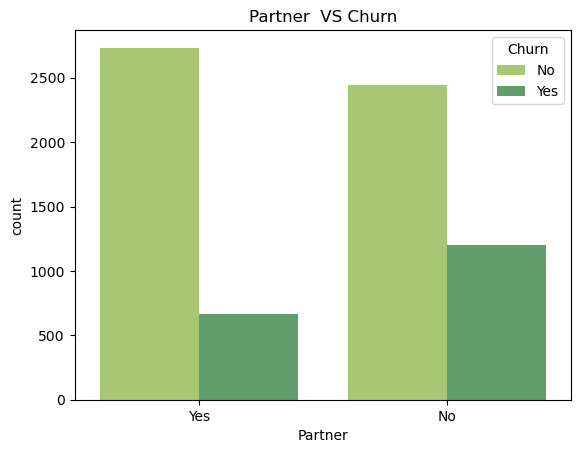

In [38]:
sns.countplot(x='Partner',hue='Churn',palette="summer_r",data=data)
plt.title('Partner  VS Churn')
plt.show()

- Those customers are having partner their is less churn rate than those dont having partner.
- "yes" churn rate is higher in single people than others.
- 'No' churn rate is high in Partner having people or customers.

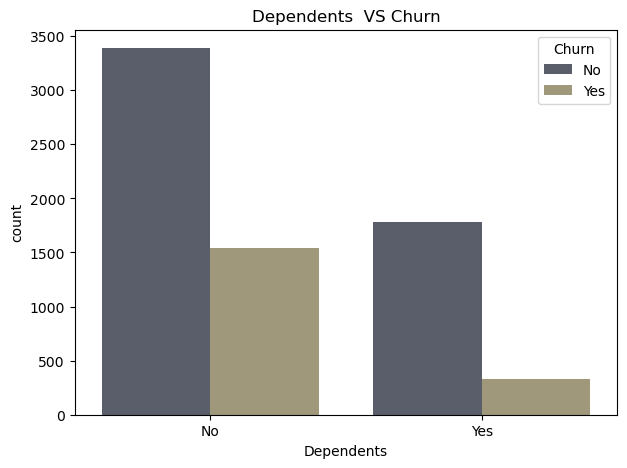

In [39]:
plt.figure(figsize=(7,5))
sns.countplot(x='Dependents',hue='Churn',palette="cividis",data=data)
plt.title('Dependents  VS Churn')
plt.show()

- In 'No' dependent, Churn "no" is high. It means that, if customer are having no dependent person on him then they have low churn rate than others.
- Sililarly, in 'Yes" dependent, very few want to leave the precent company.

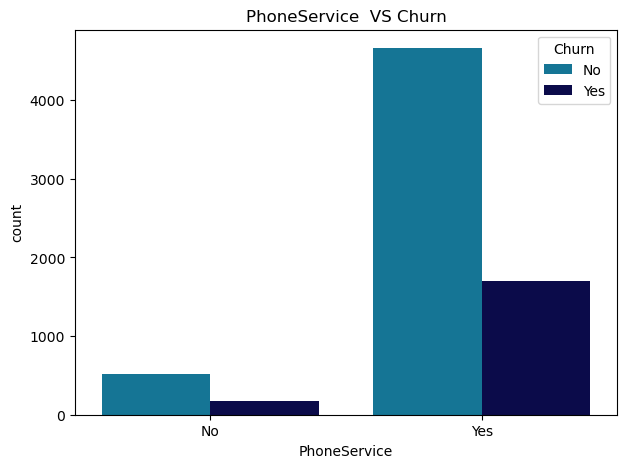

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(x='PhoneService',hue='Churn',palette="ocean_r",data=data)
plt.title('PhoneService  VS Churn')
plt.show()

- We can see, in 'Yes' Phone services having more 'Yes' churn rate than No used phone service.
- It is obviously, Those are using phone service they thay having high curn rate.

<AxesSubplot:xlabel='tenure', ylabel='count'>

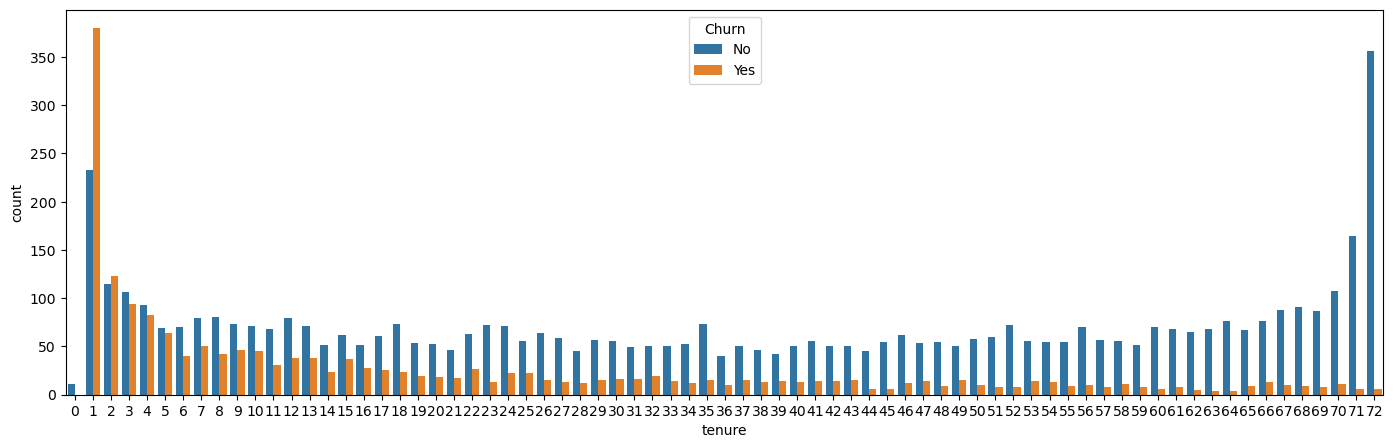

In [41]:
plt.figure(figsize=(17,5))
sns.countplot(x='tenure',hue='Churn',data=data)

- In tenure 1 to 5, in this the customer churn rate is high and from 1 it is in decresing.
- But tenure from 65 to 72 'No' churn rate is increasing.

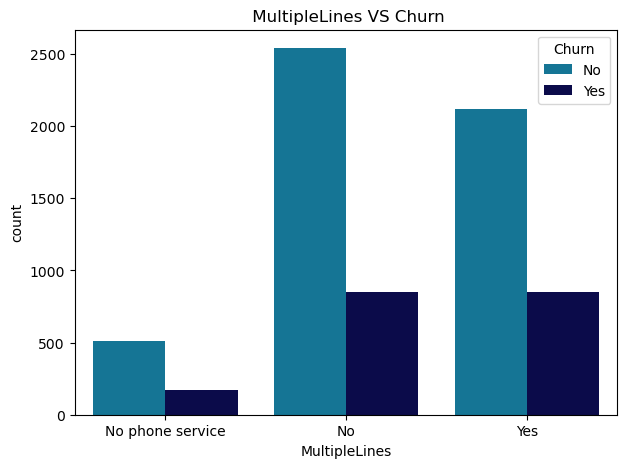

In [42]:
plt.figure(figsize=(7,5))
sns.countplot(x='MultipleLines',hue='Churn',palette="ocean_r",data=data)
plt.title(' MultipleLines VS Churn')
plt.show()

- Those customers are using Multiplesline they are having high 'No' churn rate.
- But in multiple line used, in which 'Yes' churn rate is high comparatively 'No' Multiple lines used.
- From above we can understand that, those costomers are used multiple line of services they have high yes churn. It mean they leave company or shif to other company.

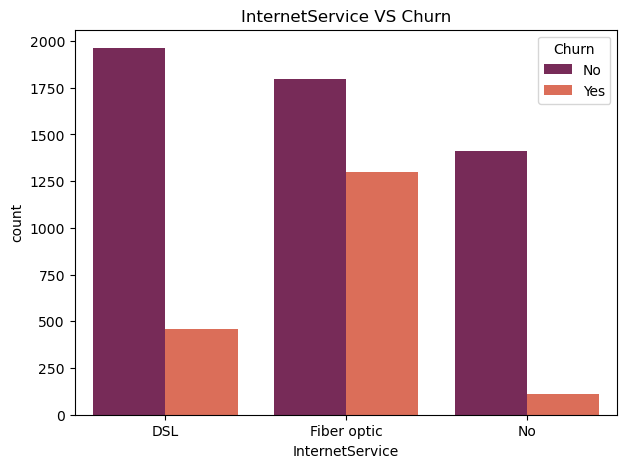

In [43]:
plt.figure(figsize=(7,5))
sns.countplot(x='InternetService',hue='Churn',palette="rocket",data=data)
plt.title('InternetService VS Churn')
plt.show()

- We can see, In fiber optic is having higher 'Yes' churn rate than others. Due to poor internet service in fiber optic most of the custoners are moving to another service providers.
- But in DSL having low 'Yes' churn rate and they having 'No' churn is high. It means their service provider are providing better service than other that's why they are having 'No' churn rate.

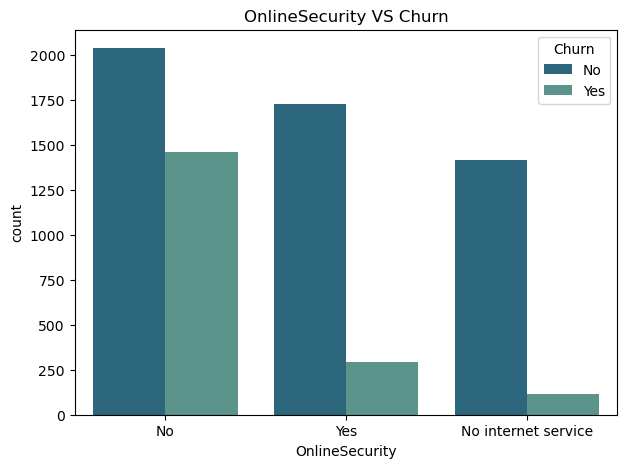

In [44]:
plt.figure(figsize=(7,5))
sns.countplot(x='OnlineSecurity',hue='Churn',palette="crest_r",data=data)
plt.title('OnlineSecurity VS Churn')
plt.show()

- We can see, those are providing good online security they are having less 'Yes' Churn rate. Online security is most important in these days because online fraud is increasing day by days.
- There is no internet service they are having very less 'Yes' churn rate.

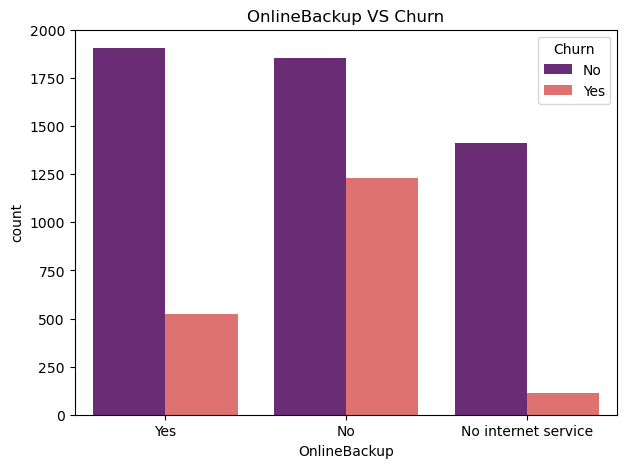

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(x='OnlineBackup',hue='Churn',palette="magma",data=data)
plt.title('OnlineBackup VS Churn')
plt.show()

- Most of the customers are leaving current company because they are not providing online backup service. online backup play very key role because at any data may be lost so if we have some backup then we can get back to our data again.
- We can see, those company are not providing online backup service they have higher rate of 'Yes' churn rate. than others.

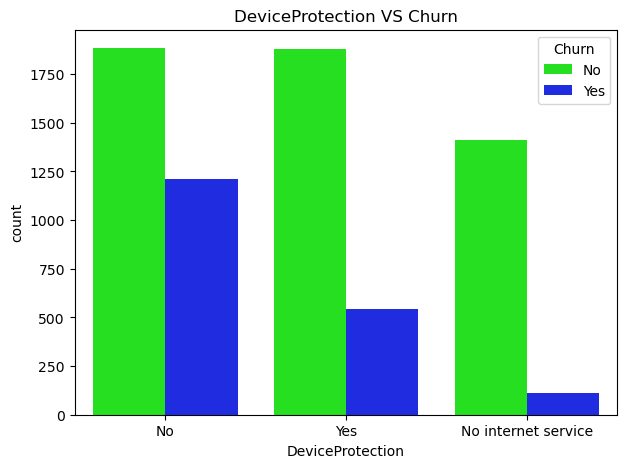

In [46]:
plt.figure(figsize=(7,5))
sns.countplot(x='DeviceProtection',hue='Churn',palette="hsv",data=data)
plt.title('DeviceProtection VS Churn')
plt.show()

- we can see, Device protection has play key role while selecting the company service. Those company are providing the device protection they have higher 'No' churn rate thab others.
- But high 'Yes' churn rate in 'No' device protection. It means that, those company not providing any device protection service they are having high 'Yes' churn rate.
- Very very less 'Yes' chur n rate in No internet service providers.

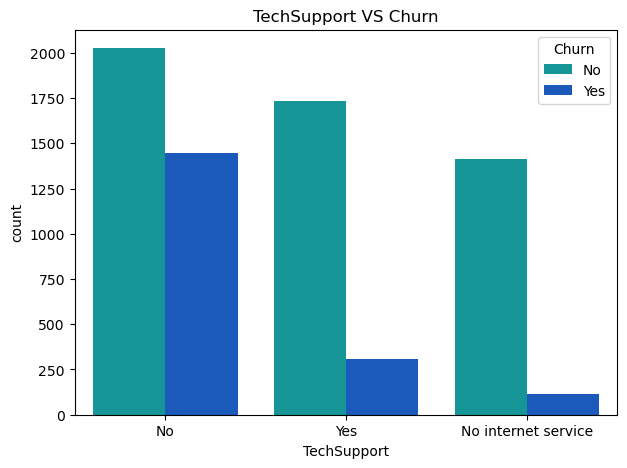

In [47]:
plt.figure(figsize=(7,5))
sns.countplot(x='TechSupport',hue='Churn',palette="winter_r",data=data)
plt.title('TechSupport VS Churn')
plt.show()

- Customer grievance redressal mechanism should be good. We can see, those company whose provide technical support to their customers they are having less 'Yes' churn rate.
- Similarly, Those comapny are not providing or technical support is very poor they are having high 'Yes' churn rate.

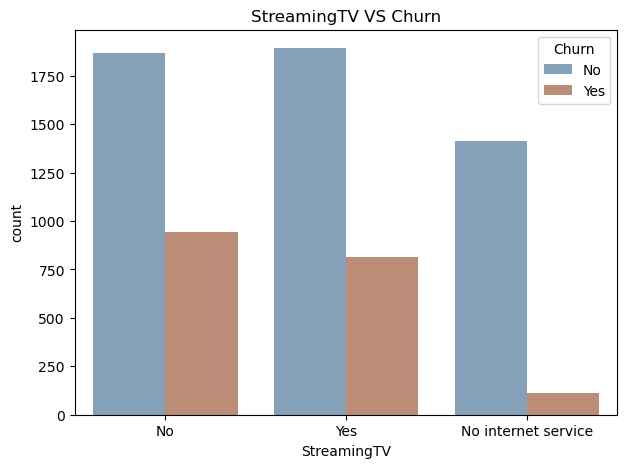

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(x='StreamingTV',hue='Churn',palette="twilight_shifted",data=data)
plt.title('StreamingTV VS Churn')
plt.show()

- We can see, those company is not providing streamingTV they are having high 'Yes' churn rate.
- Very less in No internet service.

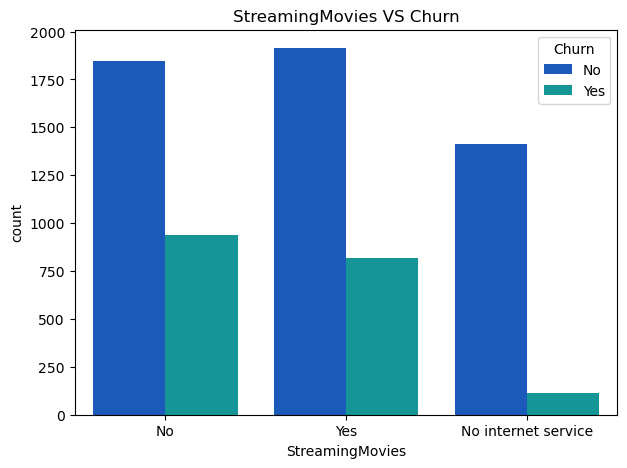

In [49]:
plt.figure(figsize=(7,5))
sns.countplot(x='StreamingMovies',hue='Churn',palette="winter",data=data)
plt.title('StreamingMovies VS Churn')
plt.show()

- StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned.

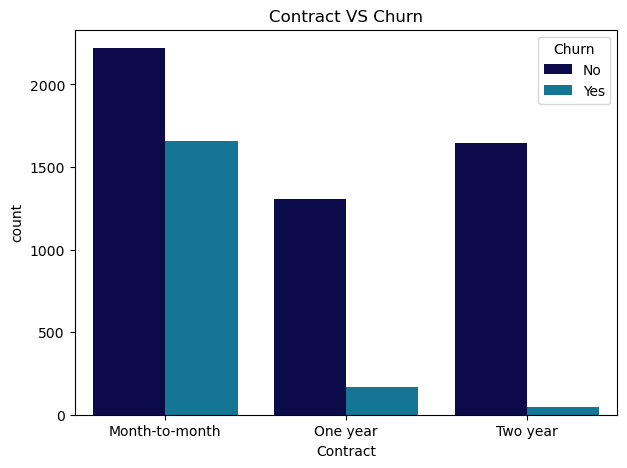

In [50]:
plt.figure(figsize=(7,5))
sns.countplot(x='Contract',hue='Churn',palette="ocean",data=data)
plt.title('Contract VS Churn')
plt.show()

- Now a days most of the customers are using mont-to-month service than yearly service because yearly package is higher and not that much attractive so that customers are preferred month-to-month service.
- In which both 'Yes' churn rate and 'No' Churn rate is high.

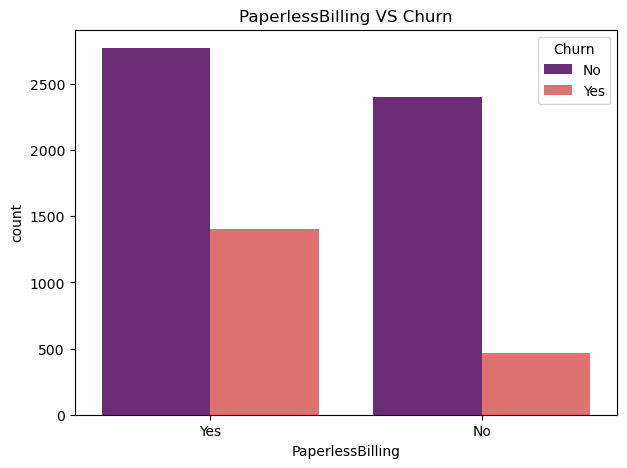

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(x='PaperlessBilling',hue='Churn',palette="magma",data=data)
plt.title('PaperlessBilling VS Churn')
plt.show()

- We can see, those company are providing paperless billing they are having high 'Yes' churn rate than not providing company.
- But paperless Billing is good way or faster than other but have some consequence. so it has high 'Yes' churn rate.

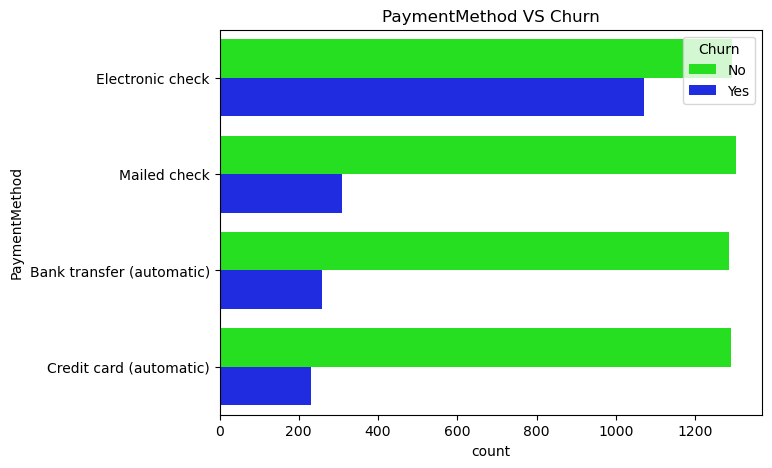

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(y='PaymentMethod',hue='Churn',palette="hsv",data=data)
plt.title('PaymentMethod VS Churn')
plt.show()

- As we seen before, most of the customers are using elctronic check method for paying. So that is has maximum 'Yes' churn rate than other method.
- But difference is very low so it need to be change and used different method of payment.
- Credit card has very low 'Yes' churn rate and it is very easy to used.

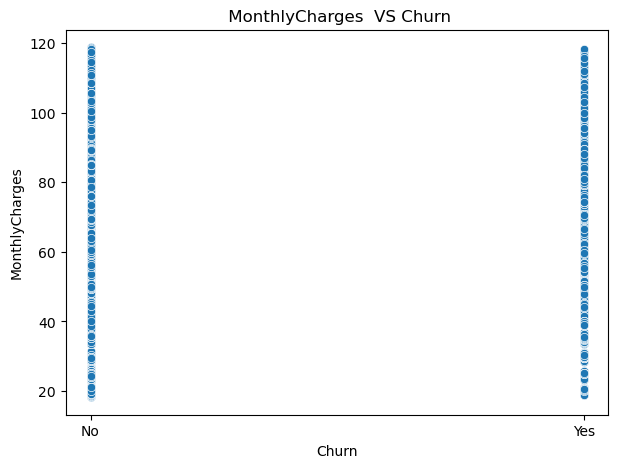

In [53]:
plt.figure(figsize=(7,5))
sns.scatterplot(y='MonthlyCharges',x='Churn',palette="summer",data=data)
plt.title(' MonthlyCharges  VS Churn')
plt.show()

- We can see, MonthlyCharges are having same churn rate for both.

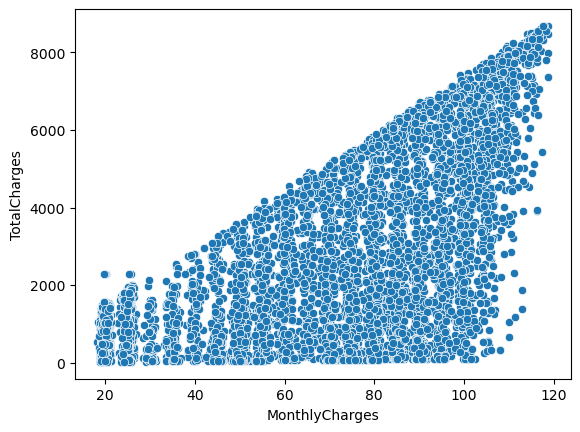

In [54]:
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=data)
plt.show()

- We can see, TotalCharges has linear relationship with MonthlyCharges.
- As monthly Charges increses then Total Charges also increse.

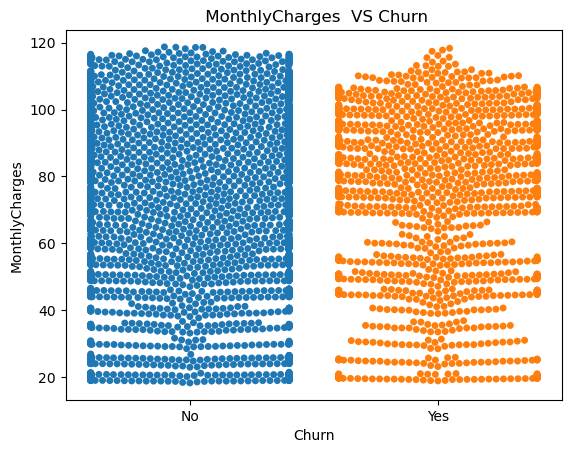

In [55]:
sns.swarmplot(x='Churn',y='MonthlyCharges',data=data)
plt.title(' MonthlyCharges  VS Churn')
plt.show()

- We can see, MonthlyCharges has high from 65.
- This MonthlyCharges range of values caused the customers to switch.

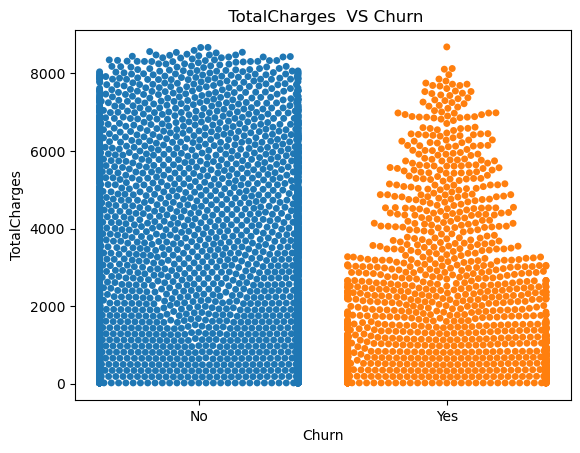

In [56]:
sns.swarmplot(x='Churn',y='TotalCharges',data=data)
plt.title(' TotalCharges  VS Churn')
plt.show()

- A very high number of customers opted out of the services for the TotalCharges above  3000. This customer churning continues for a TotalCharges range of values from 0 - 3000. 

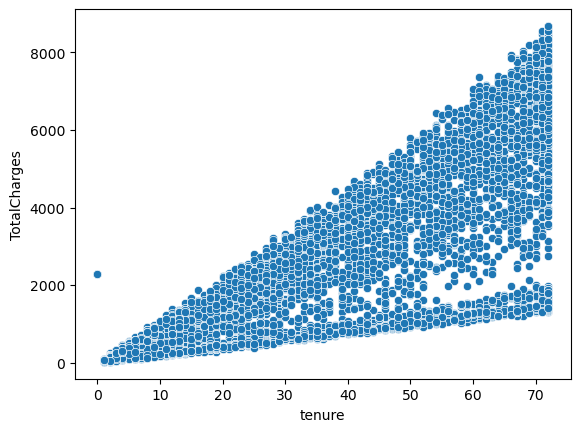

In [57]:
sns.scatterplot(x='tenure',y='TotalCharges',data=data)
plt.show()

- Both features are having linear relationship It means that, if tenure is increses then totalCharges also increases.

##  Multivariate Analysis

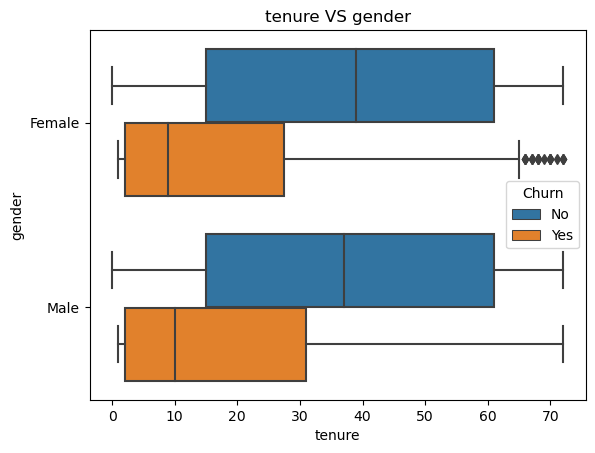

In [58]:
sns.boxplot(x='tenure',y='gender',data=data,hue='Churn')
plt.title('tenure VS gender')
plt.show()

- We can see, Male and feamle are having same curn rate.
- median tenure bor 'No' churn has 35. whereas for 'Yes' churn 10.

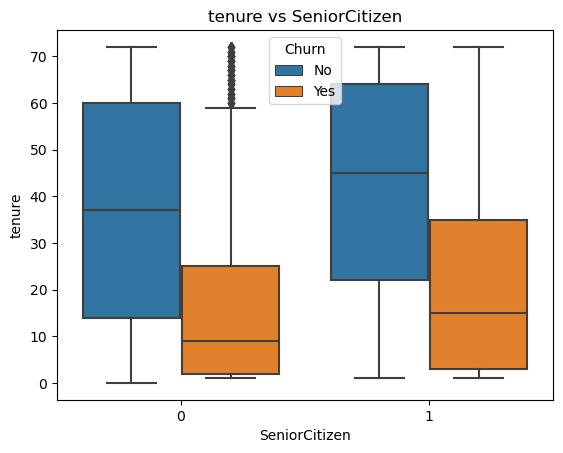

In [59]:
sns.boxplot(y='tenure',x='SeniorCitizen',data=data,hue='Churn')
plt.title('tenure vs SeniorCitizen')
plt.show()

- SeniorCitizen are from the services for a tenure values of 0 - 35 months. 20 - 35 months is the kind of decision making period about whether to continue or swtich for SeniorCitizen.

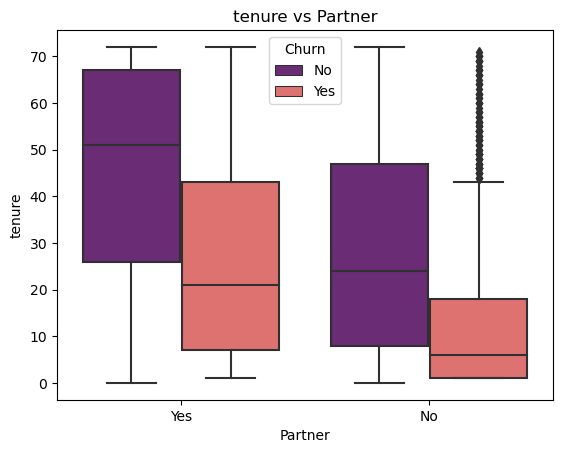

In [60]:
sns.boxplot(x='Partner',y='tenure',hue='Churn',data=data,palette='magma')
plt.title('tenure vs Partner')
plt.show()

- Similarly, customers with partners continued with the service for a tenure of 5 - 45 months.

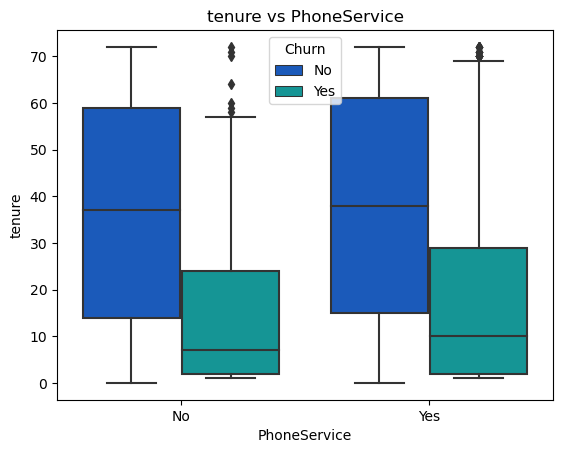

In [61]:
sns.boxplot(x='PhoneService',y='tenure',hue='Churn',data=data,palette='winter')
plt.title('tenure vs PhoneService')
plt.show()

- Those are using phoneService  median of tenure is having 15 for 'Yes' churn.
- Those are not using phone service they have low tenure than those are using phone service.

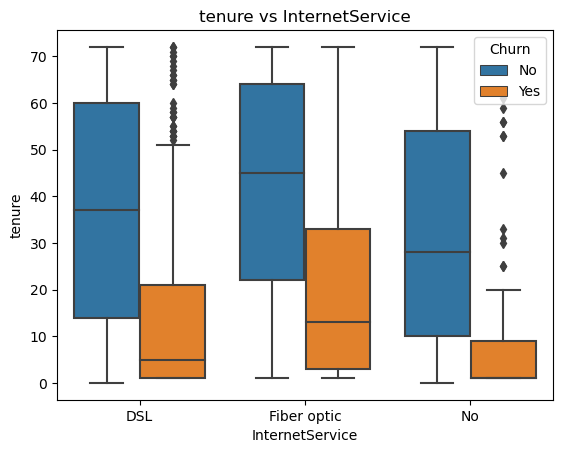

In [62]:
sns.boxplot(x='InternetService',y='tenure',hue='Churn',data=data)
plt.title('tenure vs InternetService')
plt.show()

- For InternetService, customers seem to be very skeptical about the usage of Optic Fibre cables as the churning lasted for about 30 - 35 months before either carrying it forward or switching to a new one!

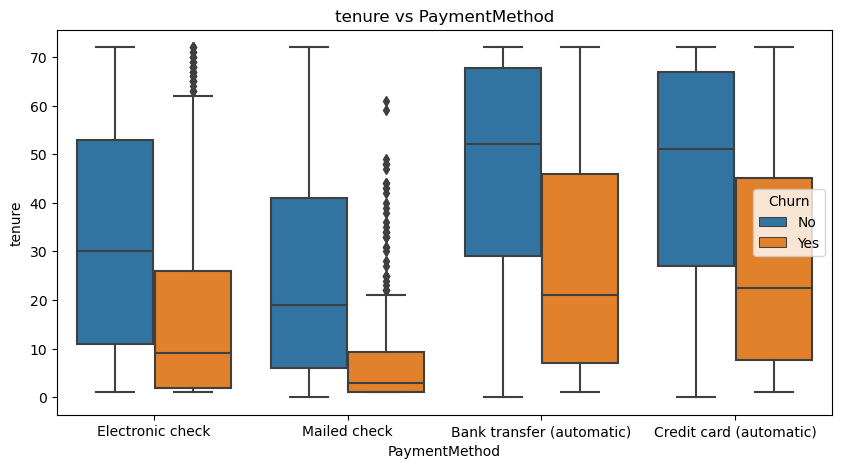

In [63]:
plt.figure(figsize=(10,5))
sns.boxplot(x='PaymentMethod',y='tenure',hue='Churn',data=data)
plt.title('tenure vs PaymentMethod')
plt.show()

- When it comes to PaymentMethod, median churn tenure of Bank Transfer (automatic) & Credit Card (automatic), above 20 months, is nearly double than that of Electronic check & Mailed check, around 10 months & around 5 months respectively.

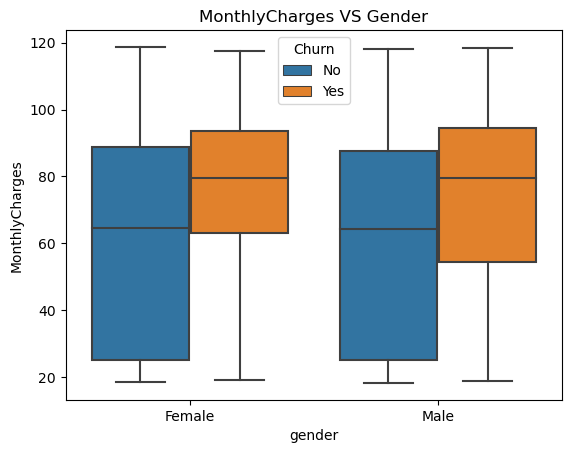

In [64]:
sns.boxplot(y='MonthlyCharges',x='gender',hue='Churn',data=data)
plt.title('MonthlyCharges VS Gender')
plt.show()

- median of monthlyChrges is almost same for both female and male.

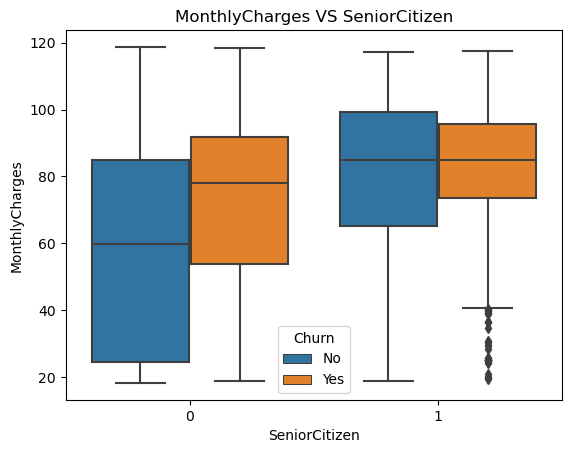

In [65]:
sns.boxplot(y='MonthlyCharges',x='SeniorCitizen',hue='Churn',data=data)
plt.title('MonthlyCharges VS SeniorCitizen')
plt.show()

- In SeniorCitizen 1, median for 'Yes and No' Churn is same i.e.80. This is highest for 'Yes' and "No" churn.
- In SeniorCitizen 0, where median for 'Yes' and 'No' is different. In which median for 'Yes' churn is 60. and median for 'No' churn is 78. In this median of 'Yes' churn is higher than median for 'No' churn.

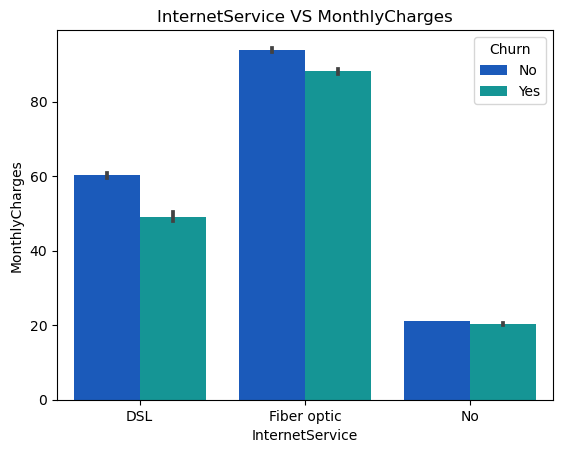

In [66]:
sns.barplot(x='InternetService',y='MonthlyCharges',hue='Churn',data=data,palette='winter')
plt.title('InternetService VS MonthlyCharges')
plt.show()

- MonthlyCharges for fiber optic hashigh i.e. 90. But it has high 'Yes' churn than Other internet service.
- Comparatively others optic fiber has high churn. But mostly in all internet service provider having same issue. In DSL also have high 'Yes' churn than 'No' Churn.
- So depending upon service monthly charges may depends.

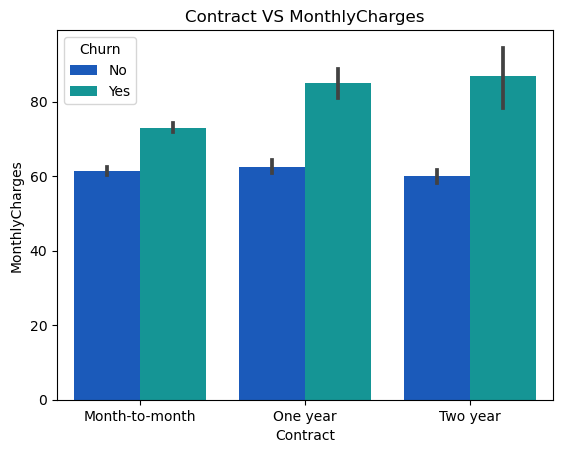

In [67]:
sns.barplot(x='Contract',y='MonthlyCharges',hue='Churn',data=data,palette='winter')
plt.title('Contract VS MonthlyCharges')
plt.show()

- Lower limit of the MonthlyCharges is higher for Month-to-Month contract than One year & Two year contracts. However the lower limit of the customers who discontinue the services is lower for Month-to-Month contract.

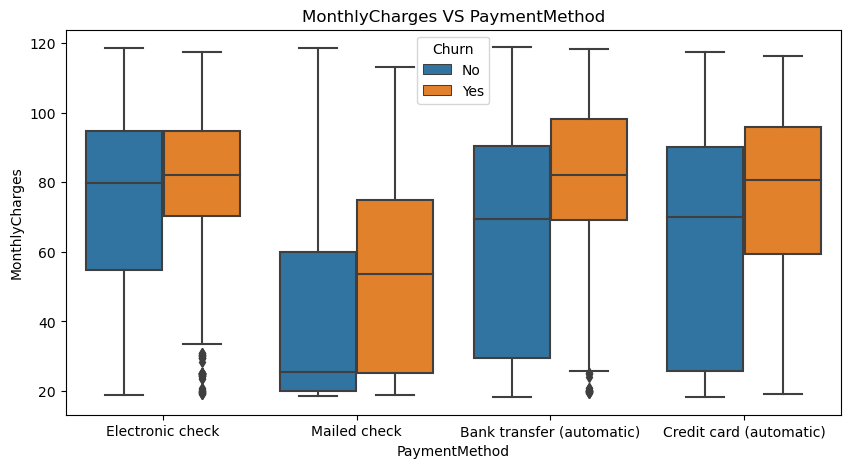

In [68]:
plt.figure(figsize=(10,5))
sns.boxplot(y='MonthlyCharges',x='PaymentMethod',hue='Churn',data=data)
plt.title('MonthlyCharges VS PaymentMethod')
plt.show()

- Lower limit of the Electronic check is very high and it can be a huge factor due to which customers resent using it! Whereas Mailed check has the lowest starting values of customers who left and continued.

##  Encoding of Data

In [69]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
data.drop(columns=['customerID'],axis=1,inplace=True)

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
df_cols=("gender","Partner","Dependents","PhoneService","MultipleLines","InternetService",'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn')
for i in df_cols:
    data[i]=le.fit_transform(data[i])

In [73]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


 ##  Describing the Dataset

In [74]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


#### Outcome of describe of datasets:

 - Difference between 75% and max in MonthlyCharges and TotalCharges is high, columns is considerable indicating presence of outliers.
 - In categories features Mean to Standrad of deviation difference is close.

##  Correlation of the features with target column

In [75]:
data.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

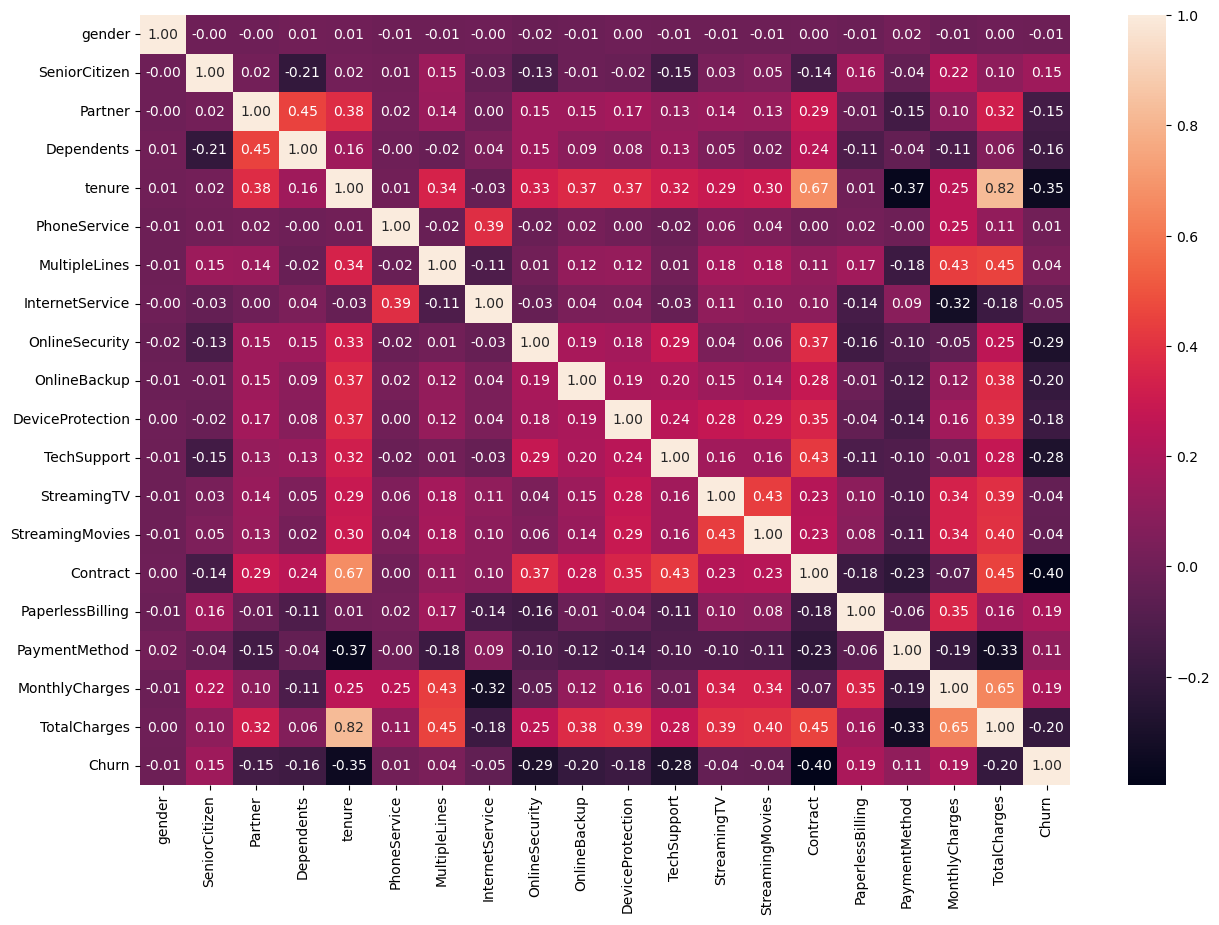

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

### Outcome of Correlation

 1. Gender has 1% negative correlation with target column.
 2. SeniorCitizen has 15% positive correlation with target column.
 3. Partner has 15% negative correlation with target column.
 4. Dependents has 15% negative correlation with target column.
 5. tenure has 35% negative correlation with target columns.
 6. OnlineSecurity has 29% negative correlation with target column.
 7. OnlineBackup has 20% negative correlation with target column.
 8. DeviceProtection has 18% negative correlation with target column.
 9. TechSupport has 28% negative correlation with target column.
 10. Contract has 40% negative correlation with target column.
 11. MonthlyCharges has 19% positive correlation with target column.
 
 #### Features correlation to each other
 
 
 
 1. Tenure has 82% positive correlation with TotalCharges.
 2. MonthlyCharges has 65% positive correlation with TotalCharges.
 3. Contract has 45% positive correlation with TotalCharges.
 4. tenure has 67% positive correlation with contract.
 

##  Visualizing correlation of feature columns with label column

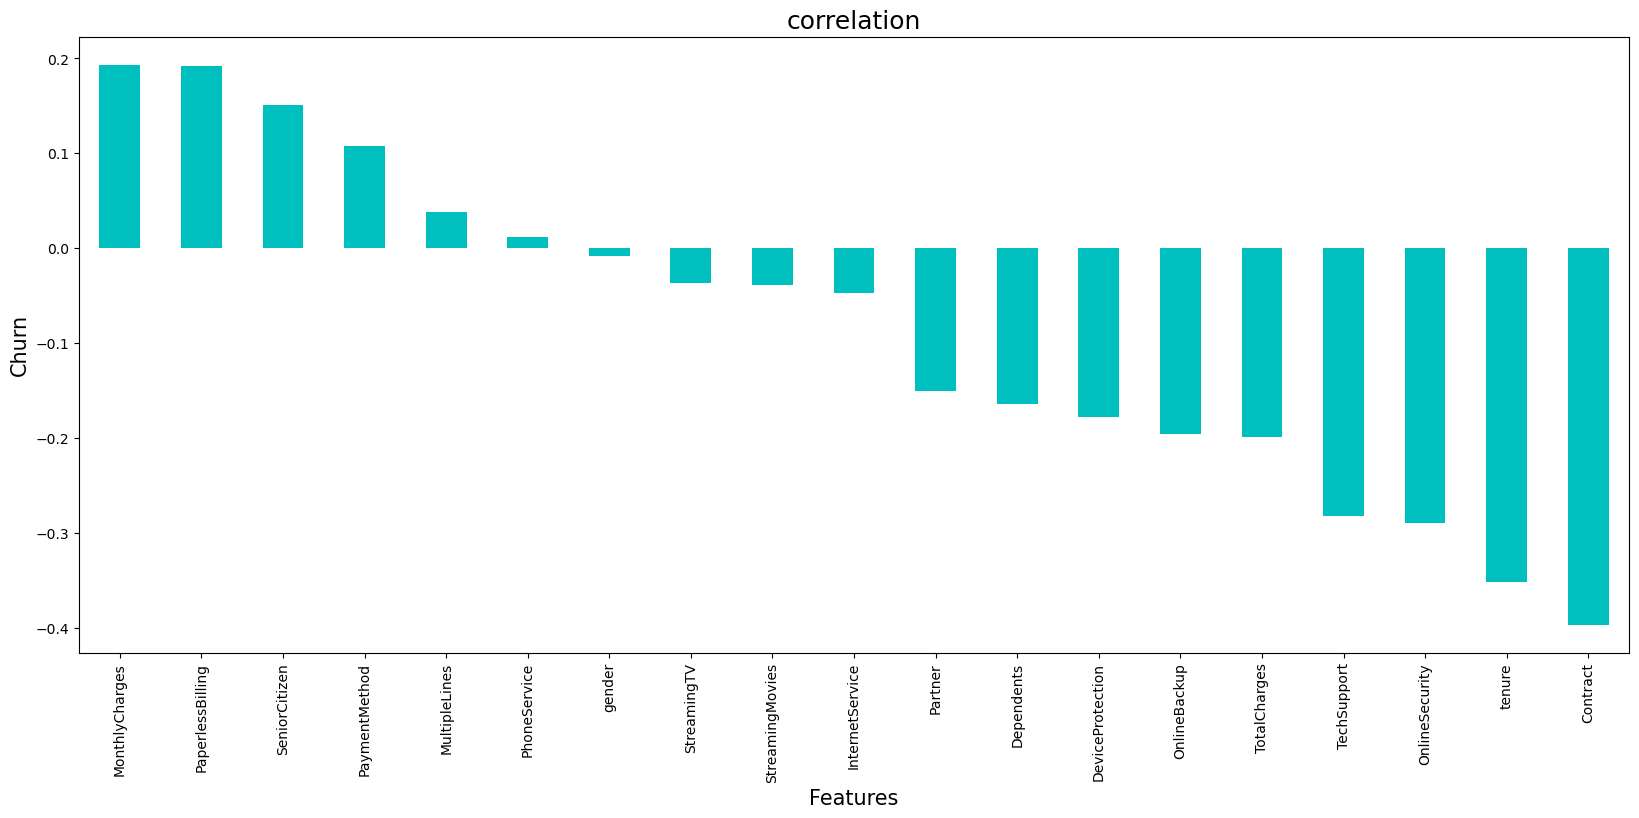

In [77]:
plt.figure(figsize=(20,8))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Churn',fontsize=15)
plt.title('correlation',fontsize=18)
plt.show()

- It is observed that MonthlyCharges and PapaerBilling have the highest positive correlation with Churn.
- While Contract, tenure and OnlineSecurity have the highest negative correlation with Churn.

##  Checking Distribution of data

In [78]:
data.shape

(7043, 20)

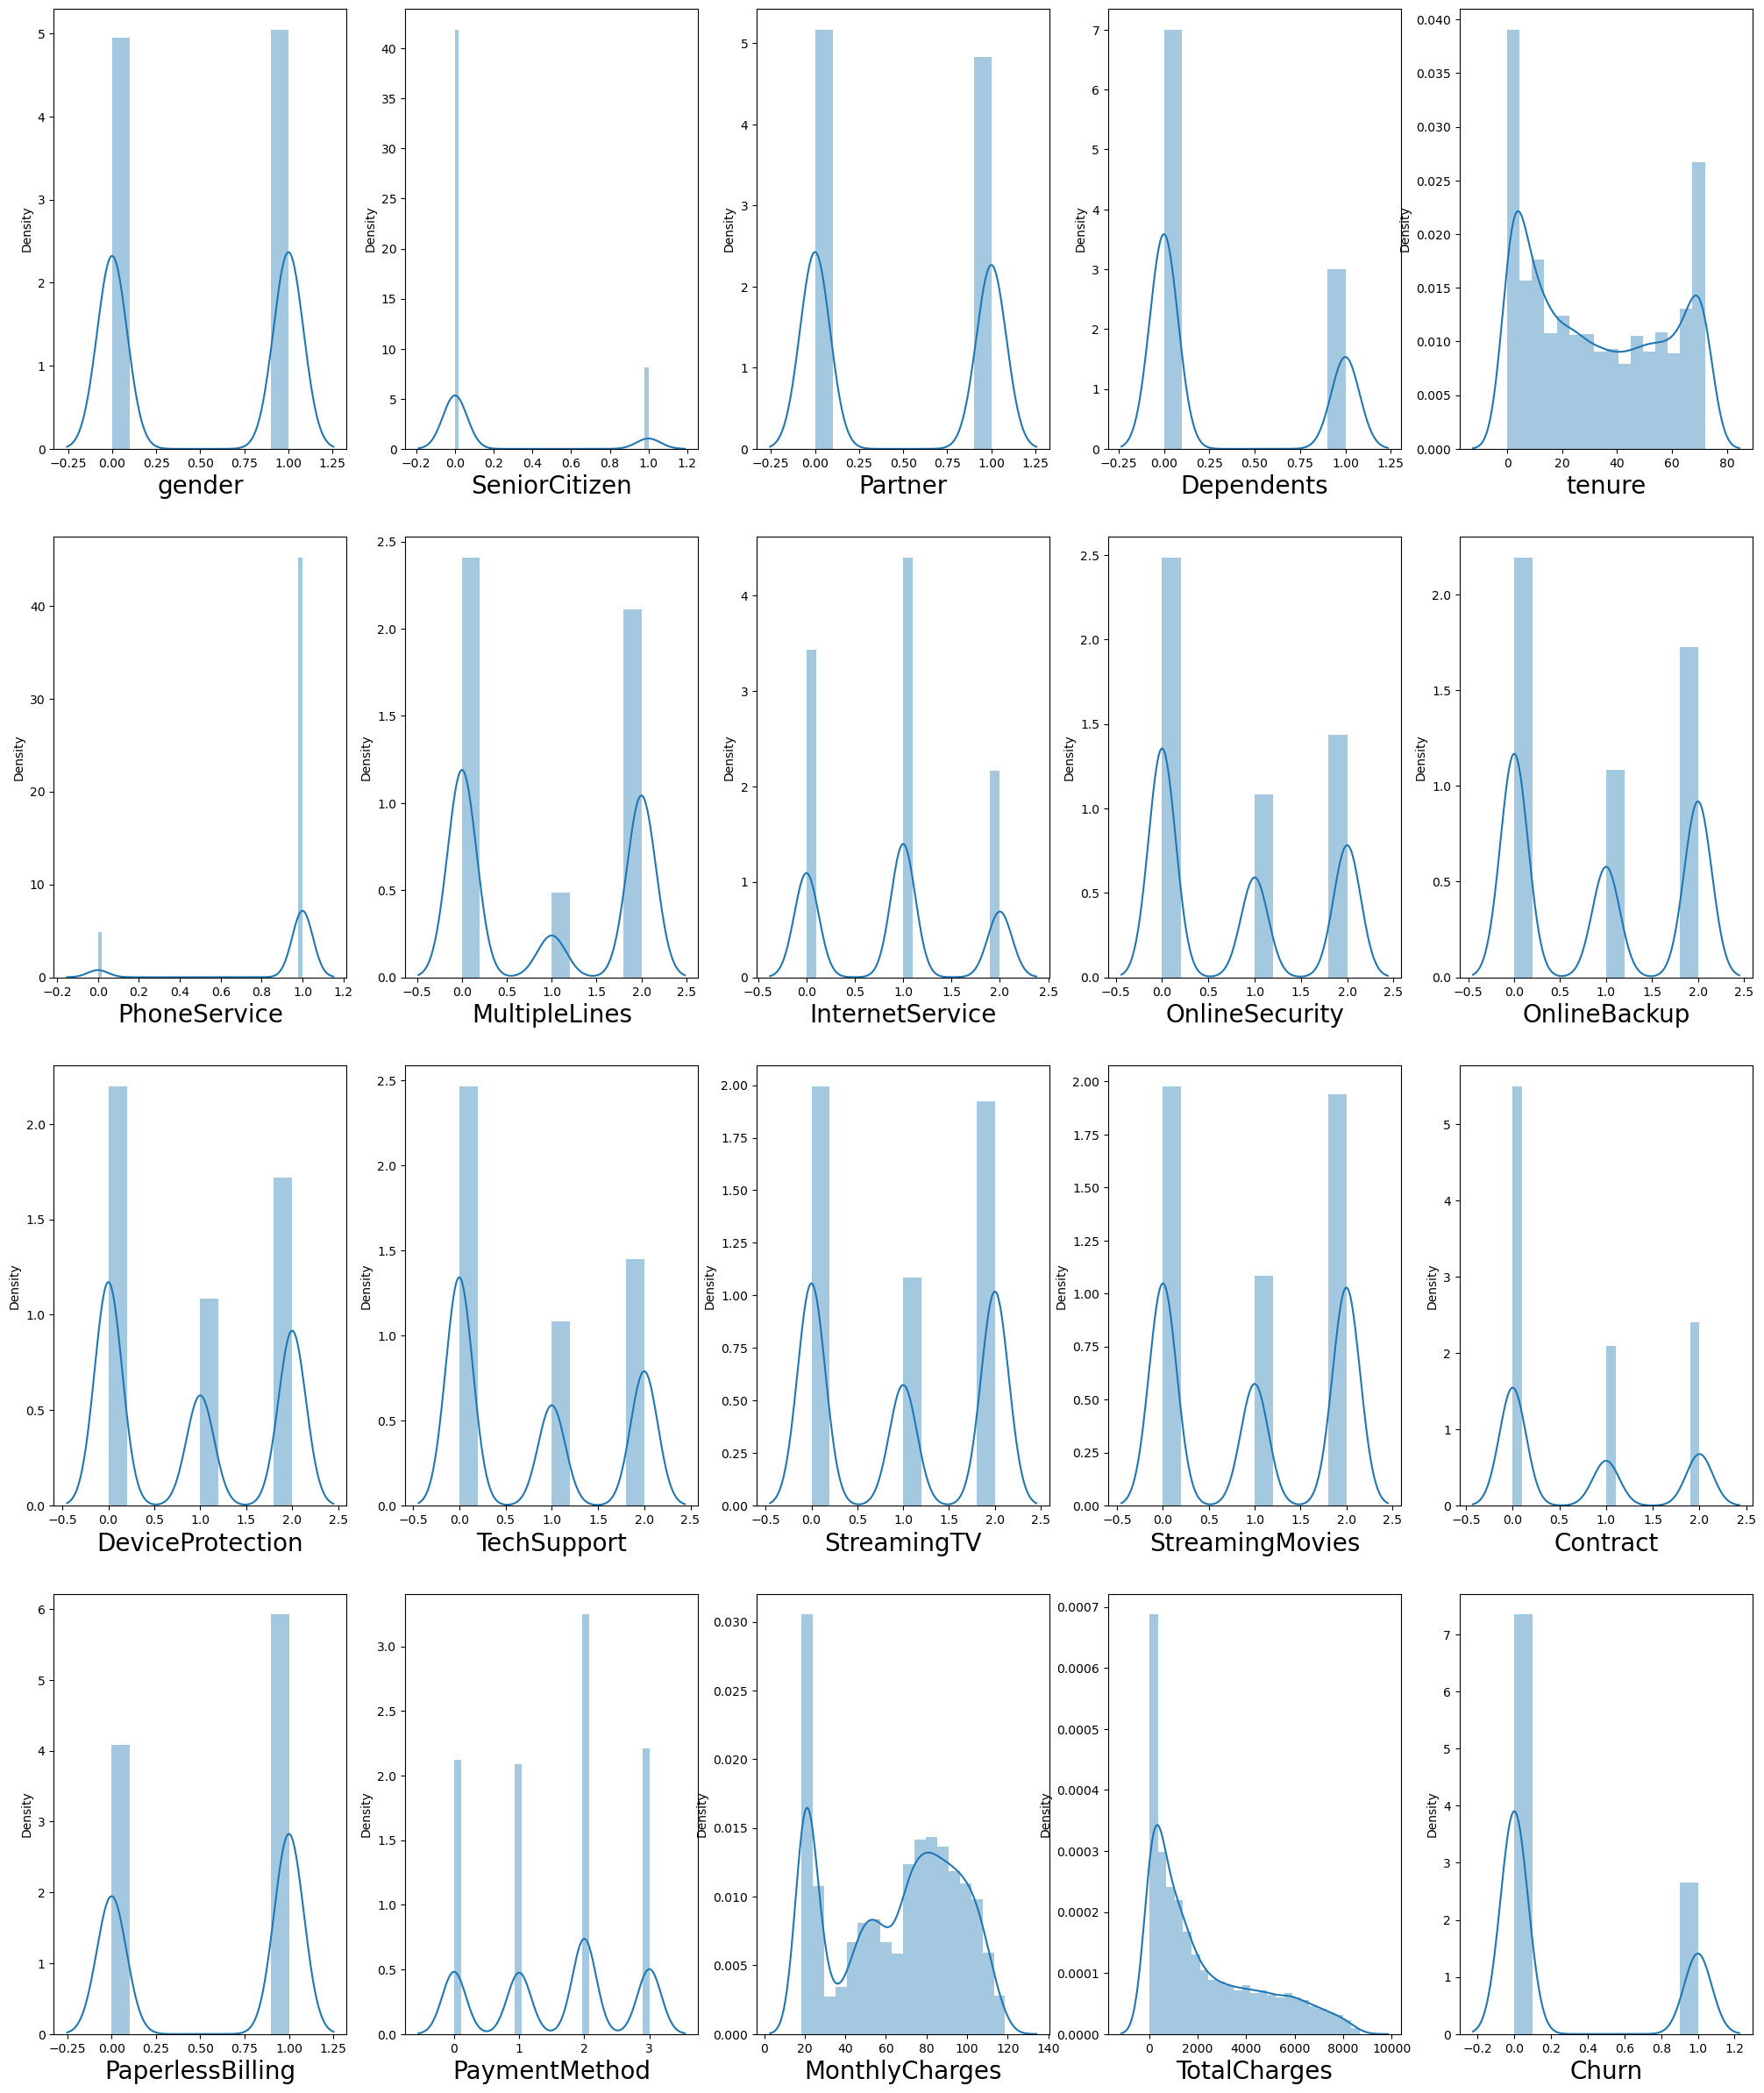

In [79]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see, MonthlyCharges and TotalCharges are positively/rightly skewed.
- All categorical features are having some skewness.

In [80]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- SeniorCitizen, Dependents, PhoneService and TotalCharges are having skewness.

##  Checking Outliers

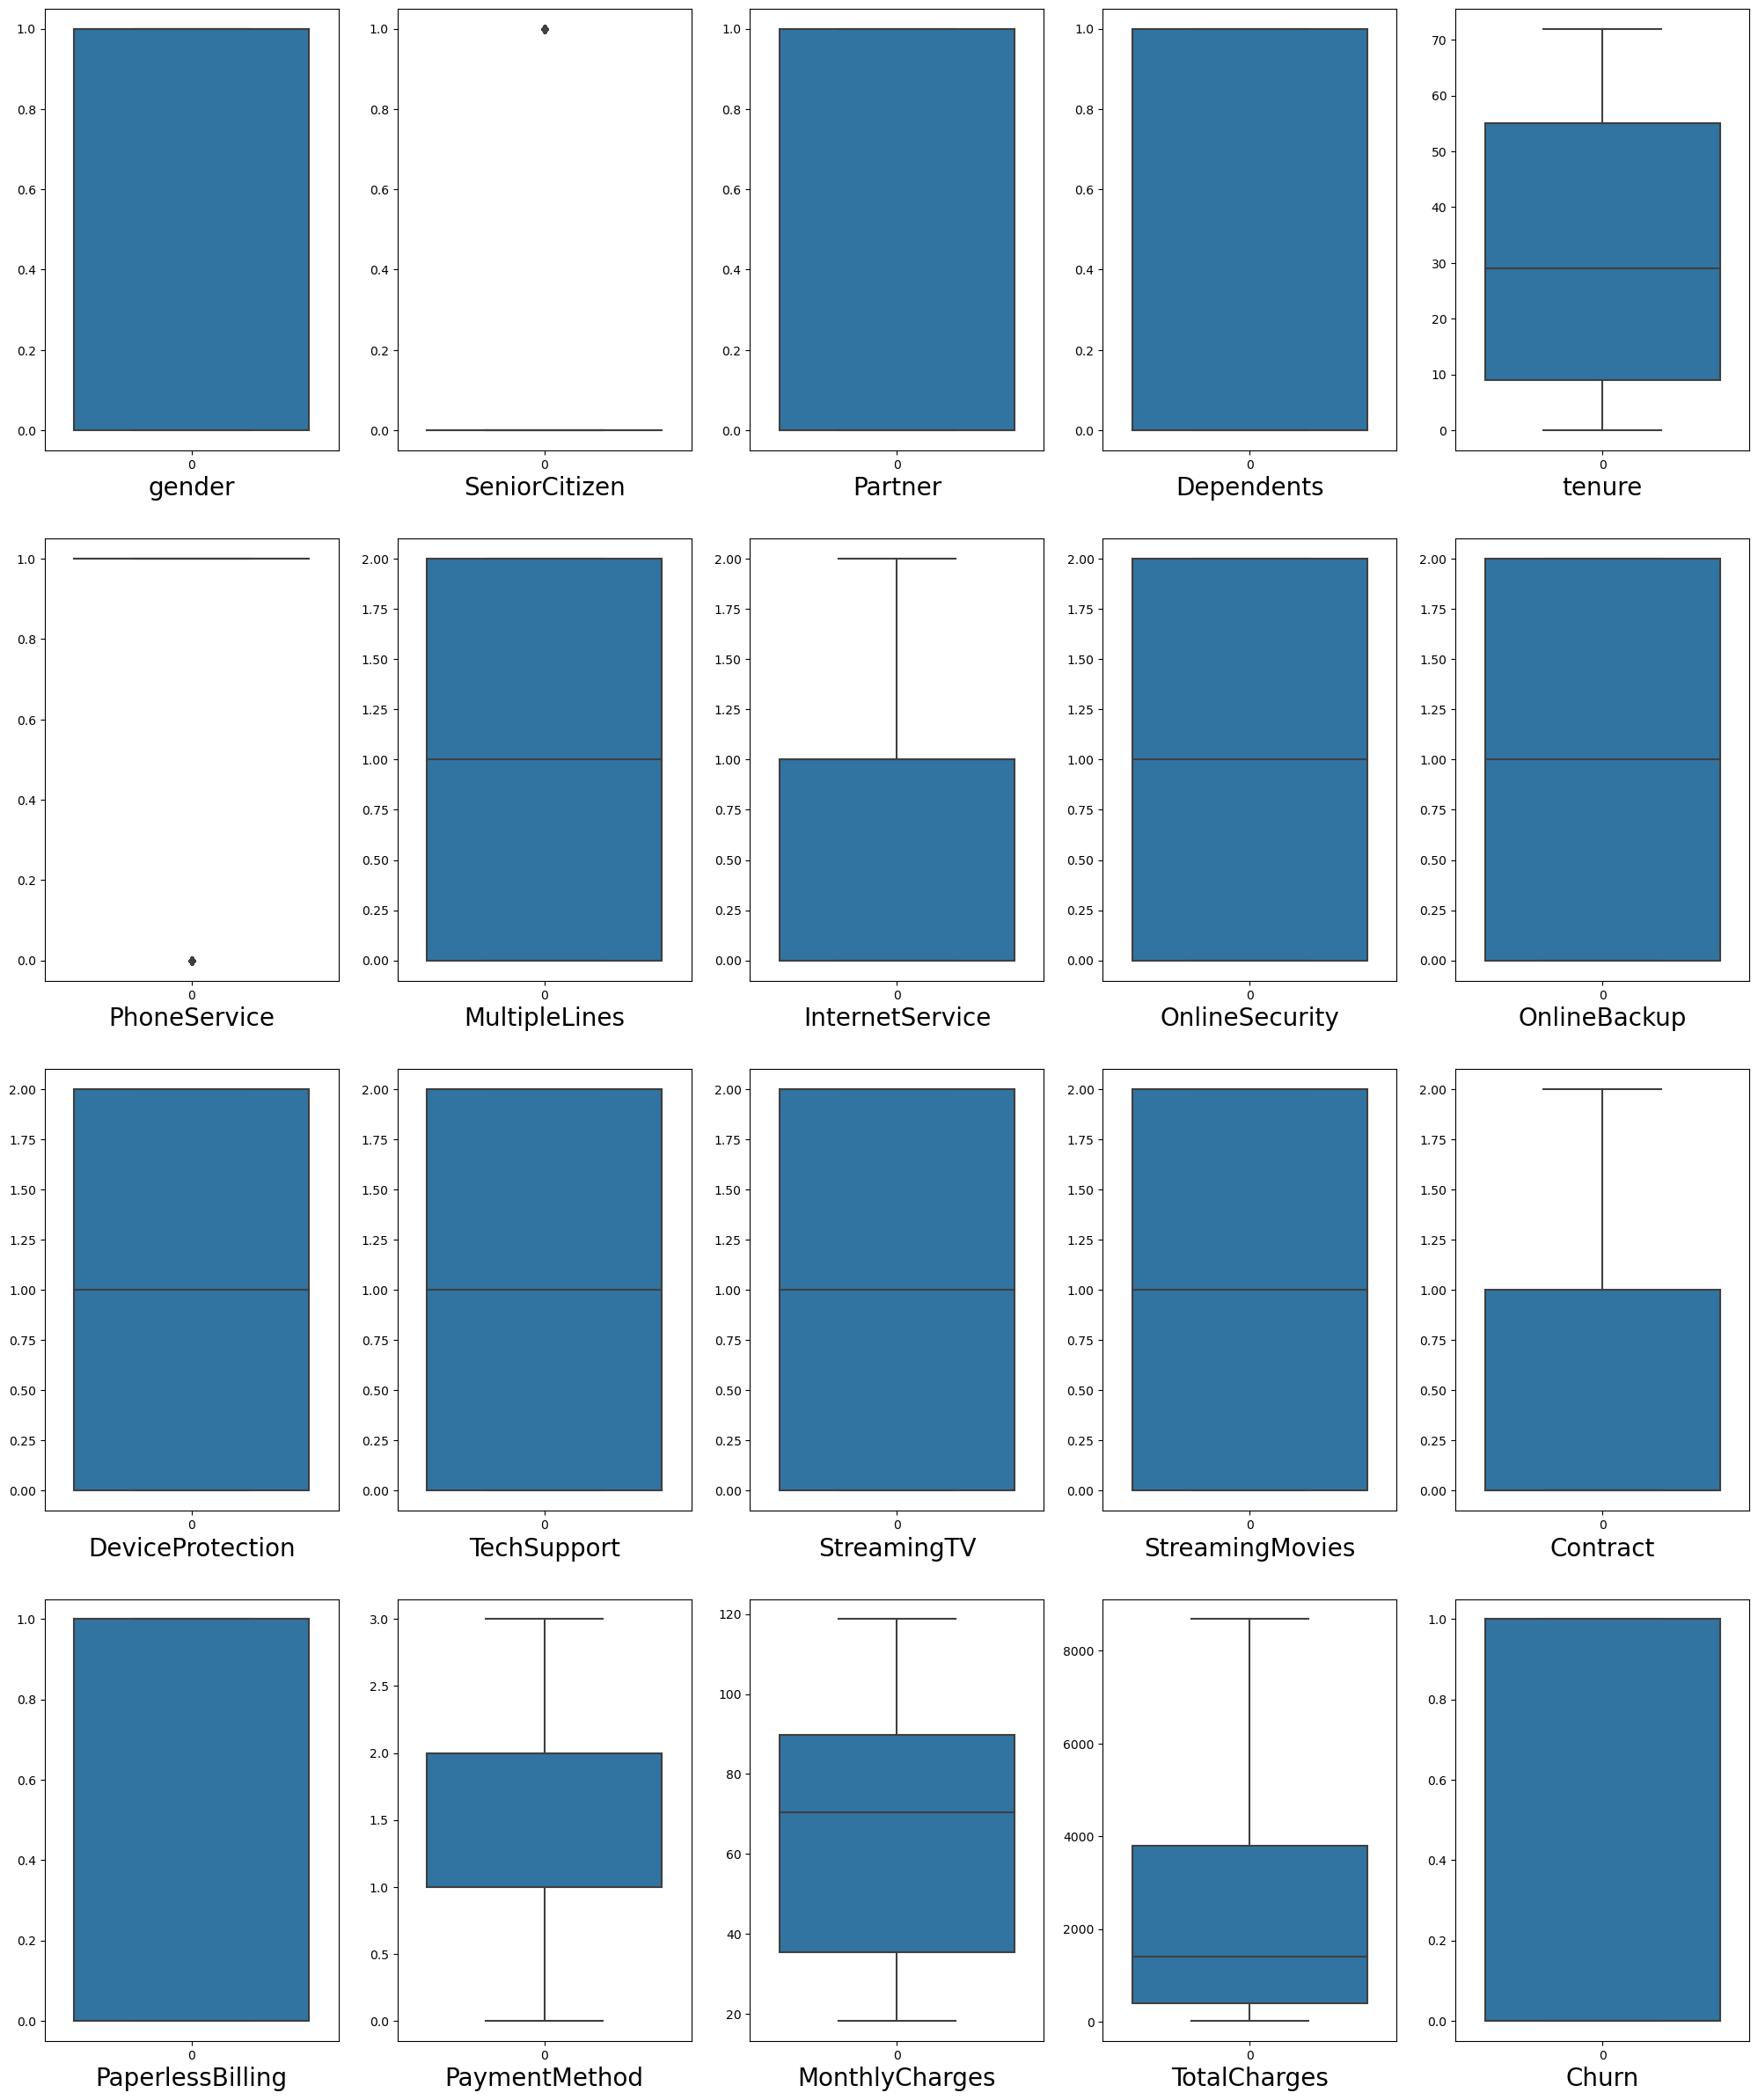

In [81]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=20:
        plt.subplot(4,5,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We can see, there are no outliers present in dataset.

##  Checking Multicollinearity

In [82]:
x=data.drop(columns=['Churn'],axis=1)
y=data['Churn']

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(x)

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
vif=pd.DataFrame()

In [87]:
vif["Features"]=x.columns
vif['vif']=[variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,gender,1.001938
1,SeniorCitizen,1.149759
2,Partner,1.461052
3,Dependents,1.382351
4,tenure,7.213411
5,PhoneService,1.622493
6,MultipleLines,1.394323
7,InternetService,1.826632
8,OnlineSecurity,1.268868
9,OnlineBackup,1.218713


- If VIF > 5, It means multicollinearity is present.
- MultiCollinearity exists in TotalCharges and tenure Based on ANOVA F scores.

###  Droping columns whose having multicollinearity

In [88]:
data.drop(columns=['TotalCharges','tenure'],axis=1, inplace=True)

In [89]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [90]:
x=data.drop(columns=['Churn'],axis=1)
y=data['Churn']

###  Data Before skewness

In [91]:
data.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
Churn               1.063031
dtype: float64

###  Data After Removing Skewmess

In [92]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [93]:
trans=pd.DataFrame(x)

In [94]:
trans.skew()

0    -0.019031
1     1.833633
2     0.067922
3     0.875199
4    -2.727153
5     0.033697
6    -0.072384
7     0.149362
8    -0.001417
9     0.001051
10    0.139751
11   -0.097211
12   -0.105641
13    0.302174
14   -0.375396
15   -0.207559
16   -0.259035
dtype: float64

#  Model Building

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [96]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.40968472, -1.1585412 ],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         1.31889872, -0.23949171],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         1.31889872, -0.34266505],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.40968472, -1.16724064],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.8297975 ,
         1.31889872,  0.33431207],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
        -1.48983732,  1.33886338]])

##  Balancing Dataset

In [97]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y=sm().fit_resample(x,y)

In [98]:
smt_y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

##   LogisticRegression

### Finding Best Random State

In [99]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.784219001610306 on Random State 523


In [100]:
 x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=940)

In [101]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7838969404186795

### Cross - validation for logistic Regression

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
pred_lr=lr.predict(x_test)
accu=accuracy_score(y_test,pred_lr)

In [104]:
for j in range(4,10):
    cross=cross_val_score(lr,x,y,cv=j)
    lsc=cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 78.29059063806721
accuracy_score is:- 78.38969404186795


At cv:- 5
Cross validation score is:- 78.46086844312536
accuracy_score is:- 78.38969404186795


At cv:- 6
Cross validation score is:- 78.37583321109597
accuracy_score is:- 78.38969404186795


At cv:- 7
Cross validation score is:- 78.33326329440014
accuracy_score is:- 78.38969404186795


At cv:- 8
Cross validation score is:- 78.43261466824889
accuracy_score is:- 78.38969404186795


At cv:- 9
Cross validation score is:- 78.56022968907702
accuracy_score is:- 78.38969404186795




In [105]:
lsscore_selected=cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7856022968907702 
The accuracy score is:  0.7838969404186795


In [106]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred=clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred)*100:.2f}%")

    
    elif train==False:
        pred=clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))
    

##   Random Forest Classifier
### Finding Best Random State

In [107]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8438003220611916 on Random State 779


In [108]:
x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=328)

In [109]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 99.57%

==========================Test Result=======================
Accuracy Score: 83.45%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84      1569
           1       0.84      0.83      0.83      1536

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105


 Confusion Matrix: 
 [[1319  250]
 [ 264 1272]]


### Cross - Validation for Random Forest classifier

In [110]:
pred_rf=rf.predict(x_test)
accu=accuracy_score(y_test,pred_rf)

In [111]:
for j in range(4,10):
    cross=cross_val_score(rf,x,y,cv=j)
    lsc=cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 75.55024263073666
accuracy_score is:- 83.44605475040258


At cv:- 5
Cross validation score is:- 75.53596199754821
accuracy_score is:- 83.44605475040258


At cv:- 6
Cross validation score is:- 75.50778131661029
accuracy_score is:- 83.44605475040258


At cv:- 7
Cross validation score is:- 75.26616439820434
accuracy_score is:- 83.44605475040258


At cv:- 8
Cross validation score is:- 75.6635344649675
accuracy_score is:- 83.44605475040258


At cv:- 9
Cross validation score is:- 75.47910866643657
accuracy_score is:- 83.44605475040258




In [112]:
lsscore_selected=cross_val_score(rf,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7555008589263824 
The accuracy score is:  0.8344605475040258


##  Gradient Boosting Classifier
### Finding Best Random State

In [113]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred=gbc.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8466988727858293 on Random State 229


In [114]:
x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=988)

In [115]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 83.20%

==========================Test Result=======================
Accuracy Score: 84.28%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1557
           1       0.83      0.86      0.85      1548

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105


 Confusion Matrix: 
 [[1283  274]
 [ 214 1334]]


### Cross - validation For GradientBoosting Classifier

In [116]:
pred_gbc=gbc.predict(x_test)
accu=accuracy_score(y_test,pred_gbc)

In [117]:
for j in range(4,10):
    cross=cross_val_score(gbc,x,y,cv=j)
    lsc=cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 78.16279812606474
accuracy_score is:- 84.28341384863124


At cv:- 5
Cross validation score is:- 78.4183556197174
accuracy_score is:- 84.28341384863124


At cv:- 6
Cross validation score is:- 78.6598475155314
accuracy_score is:- 84.28341384863124


At cv:- 7
Cross validation score is:- 78.3330940728166
accuracy_score is:- 84.28341384863124


At cv:- 8
Cross validation score is:- 78.29064982973892
accuracy_score is:- 84.28341384863124


At cv:- 9
Cross validation score is:- 78.50343165381724
accuracy_score is:- 84.28341384863124




In [118]:
lsscore_selected=cross_val_score(gbc,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7851762208946362 
The accuracy score is:  0.8428341384863124


##  XGBOOST
### Finding Best Random State

In [119]:
from xgboost import XGBClassifier

In [120]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    xgb=XGBClassifier()
    xgb.fit(x_train, y_train)
    pred=xgb.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8492753623188406 on Random State 940


In [121]:
x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=79)

In [122]:
#import xgboost as xgb
xgb=XGBClassifier()

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 91.44%

==========================Test Result=======================
Accuracy Score: 84.67%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1548
           1       0.84      0.85      0.85      1557

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105


 Confusion Matrix: 
 [[1305  243]
 [ 233 1324]]


### Cross - Validation for XGBOOST

In [123]:
pred_xgb=xgb.predict(x_test)
accu=accuracy_score(y_test,pred_xgb)

In [124]:
for j in range(4,10):
    cross=cross_val_score(xgb,x,y,cv=j)
    lsc=cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 76.54424623148005
accuracy_score is:- 84.66988727858293


At cv:- 5
Cross validation score is:- 76.38793228595394
accuracy_score is:- 84.66988727858293


At cv:- 6
Cross validation score is:- 76.01891508399524
accuracy_score is:- 84.66988727858293


At cv:- 7
Cross validation score is:- 75.97614765372863
accuracy_score is:- 84.66988727858293


At cv:- 8
Cross validation score is:- 76.55790488597668
accuracy_score is:- 84.66988727858293


At cv:- 9
Cross validation score is:- 76.31656212561838
accuracy_score is:- 84.66988727858293




In [125]:
lsscore_selected=cross_val_score(xgb,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7655790488597668 
The accuracy score is:  0.8466988727858293


##  SVC
### Finding Best Random State

In [126]:
from sklearn.svm import SVC

In [127]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred=svc.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8138486312399356 on Random State 79


In [128]:
x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=229)

In [129]:
svc=SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 81.84%

==========================Test Result=======================
Accuracy Score: 80.10%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1552
           1       0.78      0.84      0.81      1553

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105


 Confusion Matrix: 
 [[1190  362]
 [ 256 1297]]


### Cross - Validation for SVC

In [130]:
pred_svc=svc.predict(x_test)
accu=accuracy_score(y_test,pred_svc)

In [131]:
for j in range(4,10):
    cross=cross_val_score(svc,x,y,cv=j)
    lsc=cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 77.94977834133499
accuracy_score is:- 80.09661835748793


At cv:- 5
Cross validation score is:- 77.85036534615136
accuracy_score is:- 80.09661835748793


At cv:- 6
Cross validation score is:- 77.96402638778149
accuracy_score is:- 80.09661835748793


At cv:- 7
Cross validation score is:- 77.99245102515845
accuracy_score is:- 80.09661835748793


At cv:- 8
Cross validation score is:- 78.0915443452688
accuracy_score is:- 80.09661835748793


At cv:- 9
Cross validation score is:- 77.8360819590205
accuracy_score is:- 80.09661835748793




In [132]:
lsscore_selected=cross_val_score(svc,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.780915443452688 
The accuracy score is:  0.8009661835748793


##  KNN
### Finding Random State

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    accuracy=accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7919484702093398 on Random State 277


In [135]:
x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=277)

In [136]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 83.68%

==========================Test Result=======================
Accuracy Score: 79.19%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.70      0.77      1537
           1       0.75      0.88      0.81      1568

    accuracy                           0.79      3105
   macro avg       0.80      0.79      0.79      3105
weighted avg       0.80      0.79      0.79      3105


 Confusion Matrix: 
 [[1073  464]
 [ 182 1386]]


### Cross - Validation for KNN

In [137]:
pred_knn=knn.predict(x_test)
accu=accuracy_score(y_test,pred_knn)

In [138]:
for j in range(4,10):
    cross=cross_val_score(knn,x,y,cv=j)
    lsc=cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 74.10188716380156
accuracy_score is:- 79.19484702093398


At cv:- 5
Cross validation score is:- 74.42841070391638
accuracy_score is:- 79.19484702093398


At cv:- 6
Cross validation score is:- 74.38598109169354
accuracy_score is:- 79.19484702093398


At cv:- 7
Cross validation score is:- 74.30071295873503
accuracy_score is:- 79.19484702093398


At cv:- 8
Cross validation score is:- 74.18690666597874
accuracy_score is:- 79.19484702093398


At cv:- 9
Cross validation score is:- 74.35713878717868
accuracy_score is:- 79.19484702093398




In [139]:
lsscore_selected=cross_val_score(knn,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7435713878717868 
The accuracy score is:  0.7919484702093398


 ##  Selecting Best Model

##  Hyperparameter Tuning

In [140]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [141]:
x_train, x_test, y_train, y_test=train_test_split(smt_x, smt_y, test_size=0.3, random_state=940)

In [142]:
param_grid=[    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
     'tol': [0.19031,0.09030],
    }]

In [143]:
gridsearch=GridSearchCV(lr, param_grid=param_grid)

In [144]:
gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'C': 0.0001,
 'max_iter': 2500,
 'penalty': 'none',
 'solver': 'sag',
 'tol': 0.19031}

In [145]:
lr=LogisticRegression(C= 0.012, max_iter=5000, penalty='none',solver='saga',tol=0.19031,)
lr.fit(x_train,y_train)

metric_score(lr,x_train,x_test,y_train, y_test, train=True)

metric_score(lr,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 75.56%

==========================Test Result=======================
Accuracy Score: 78.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      1537
           1       0.77      0.81      0.79      1568

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105


 Confusion Matrix: 
 [[1156  381]
 [ 302 1266]]


##  ROC_AUC Curve

In [146]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

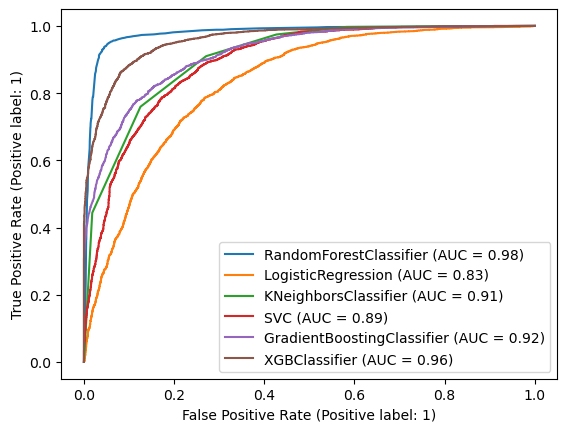

In [147]:
# AUC Curve For Training
disp=plot_roc_curve(rf,x_train,y_train)

plot_roc_curve(lr,x_train,y_train, ax=disp.ax_)

plot_roc_curve(knn,x_train,y_train, ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train, ax=disp.ax_)

plot_roc_curve(gbc, x_train,y_train, ax=disp.ax_)

plot_roc_curve(xgb, x_train,y_train, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

<Figure size 2000x1500 with 0 Axes>

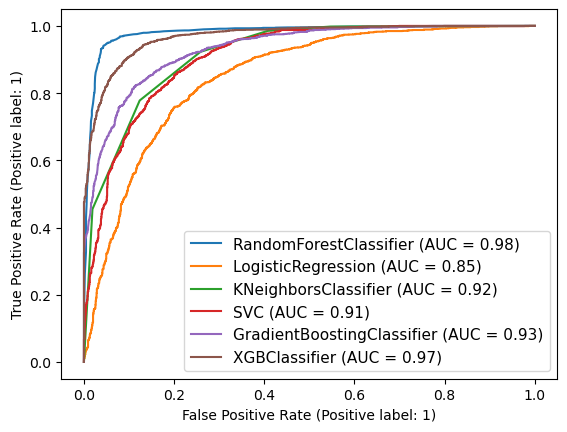

In [148]:
# AUC curve for testing

plt.figure(figsize=(20,15))

disp=plot_roc_curve(rf,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test, ax=disp.ax_)

plot_roc_curve(gbc, x_test,y_test, ax=disp.ax_)

plot_roc_curve(xgb, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

##  Model Save

In [149]:
import joblib
joblib.dump(lr,"Customers_Churn_prediction.pkl")

['Customers_Churn_prediction.pkl']

### Loading The Model

In [150]:
mod=joblib.load("Customers_Churn_prediction.pkl")

In [151]:
print(mod.predict(x))

[1 0 0 ... 0 1 0]


In [152]:
Prediction_accuracy=pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,1,0
1,0,0
2,0,1
3,0,0
4,1,1
5,1,1
6,1,0
7,1,0
8,1,1
9,0,0


# >>>>>>>>DONE<<<<<<<